In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

In [35]:
print(pd.__version__)
print(np.__version__)

1.5.3
1.26.4


In [36]:
path = '/Users/jun/GitStudy/Data_4/Data/eCommerce3'
os.chdir(path)

In [37]:
# 데이터 불러오기
data_cleaned_df = pd.read_csv('capstone_data_cleaned.csv')

In [38]:
# 데이터 상태 확인
data_cleaned_df.T

0       \
order_id                       e481f51cbdc54678b7cc49136f2d6af7   
customer_id                    7c396fd4830fd04220f754e42b4e5bff   
order_purchase_timestamp                        10/2/2017 10:56   
order_approved_at                               10/2/2017 11:07   
order_delivered_timestamp                      10/10/2017 21:25   
order_estimated_delivery_date                   10/18/2017 0:00   
order_item_id                                                 1   
product_id                     87285b34884572647811a353c7ac498a   
seller_id                      3504c0cb71d7fa48d967e0e4c94d59d9   
price                                                     29.99   
shipping_charges                                           8.72   
payment_type                                        credit_card   
payment_installments                                          1   
payment_value                                             18.12   
product_category_name                                housewares   
product_weight_g                                          500.0   
product_length_cm                                          19.0   
product_height_cm                                           8.0   
product_width_cm                                           13.0   
customer_zip_code_prefix                                   3149   
customer_city                                         sao paulo   
customer_state                                               SP   

                                                         1       \
order_id                       e481f51cbdc54678b7cc49136f2d6af7   
customer_id                    7c396fd4830fd04220f754e42b4e5bff   
order_purchase_timestamp                        10/2/2017 10:56   
order_approved_at                               10/2/2017 11:07   
order_delivered_timestamp                      10/10/2017 21:25   
order_estimated_delivery_date                   10/18/2017 0:00   
order_item_id                                                 1   
product_id                     87285b34884572647811a353c7ac498a   
seller_id                      3504c0cb71d7fa48d967e0e4c94d59d9   
price                                                     29.99   
shipping_charges                                           8.72   
payment_type                                        credit_card   
payment_installments                                          1   
payment_value                                             18.12   
product_category_name                                housewares   
product_weight_g                                          500.0   
product_length_cm                                          19.0   
product_height_cm                                           8.0   
product_width_cm                                           13.0   
customer_zip_code_prefix                                   3149   
customer_city                                         sao paulo   
customer_state                                               SP   

                                                         2       \
order_id                       e481f51cbdc54678b7cc49136f2d6af7   
customer_id                    7c396fd4830fd04220f754e42b4e5bff   
order_purchase_timestamp                        10/2/2017 10:56   
order_approved_at                               10/2/2017 11:07   
order_delivered_timestamp                      10/10/2017 21:25   
order_estimated_delivery_date                   10/18/2017 0:00   
order_item_id                                                 1   
product_id                     87285b34884572647811a353c7ac498a   
seller_id                      3504c0cb71d7fa48d967e0e4c94d59d9   
price                                                     29.99   
shipping_charges                                           8.72   
payment_type                                            voucher   
payment_installments                                          1   
payment_value                      

In [39]:
data_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119614 entries, 0 to 119613
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119614 non-null  object 
 1   customer_id                    119614 non-null  object 
 2   order_purchase_timestamp       119614 non-null  object 
 3   order_approved_at              119614 non-null  object 
 4   order_delivered_timestamp      119614 non-null  object 
 5   order_estimated_delivery_date  119614 non-null  object 
 6   order_item_id                  119614 non-null  int64  
 7   product_id                     119614 non-null  object 
 8   seller_id                      119614 non-null  object 
 9   price                          119614 non-null  float64
 10  shipping_charges               119614 non-null  float64
 11  payment_type                   119614 non-null  object 
 12  payment_installments          

In [40]:
data_cleaned_df.describe().round(2)

order_item_id      price  shipping_charges  payment_installments  \
count      119614.00  119614.00         119614.00             119614.00   
mean            1.19     101.99             18.45                  2.85   
std             0.63     107.05             10.69                  2.63   
min             1.00       0.85              0.00                  0.00   
25%             1.00      39.00             12.84                  1.00   
50%             1.00      69.90             16.11                  1.00   
75%             1.00     125.87             20.16                  4.00   
max            21.00     999.90             99.65                 10.00   

       payment_value  product_weight_g  product_length_cm  product_height_cm  \
count      119614.00         119614.00          119614.00          119614.00   
mean          145.10           1653.63              29.59              15.70   
std           137.73           2515.89              15.49              12.15   
min             0.00              0.00               7.00               2.00   
25%            59.06            283.00              18.00               8.00   
50%           104.52            650.00              25.00              12.00   
75%           177.91           1650.00              37.00              20.00   
max           999.68          14950.00             105.00             105.00   

       product_width_cm  customer_zip_code_prefix  
count         119614.00                 119614.00  
mean              22.53                  34806.05  
std               11.15                  29834.72  
min                6.00                   1003.00  
25%               15.00                  11045.00  
50%               20.00                  24210.00  
75%               30.00                  58039.00  
max              118.00                  99980.00

# 전처리

## 1. 데이터 타입 변경

In [41]:
# item_id, customer_zip_code_prefix 숫자에서 문자열로 변경
data_cleaned_df['order_item_id'] = data_cleaned_df['order_item_id'].astype(str)
data_cleaned_df['customer_zip_code_prefix'] = data_cleaned_df['customer_zip_code_prefix'].astype(str)

# to_datetime
data_cleaned_df['order_purchase_timestamp'] = pd.to_datetime(data_cleaned_df['order_purchase_timestamp'])
data_cleaned_df['order_delivered_timestamp'] = pd.to_datetime(data_cleaned_df['order_delivered_timestamp'])
data_cleaned_df['order_approved_at']=pd.to_datetime(data_cleaned_df['order_approved_at'])
data_cleaned_df['order_estimated_delivery_date'] = pd.to_datetime(data_cleaned_df['order_estimated_delivery_date'])

# to_numeric
data_cleaned_df['order_item_id'] = pd.to_numeric(data_cleaned_df['order_item_id'], errors='coerce').astype(int)

In [42]:
data_cleaned_df.T

0       \
order_id                       e481f51cbdc54678b7cc49136f2d6af7   
customer_id                    7c396fd4830fd04220f754e42b4e5bff   
order_purchase_timestamp                    2017-10-02 10:56:00   
order_approved_at                           2017-10-02 11:07:00   
order_delivered_timestamp                   2017-10-10 21:25:00   
order_estimated_delivery_date               2017-10-18 00:00:00   
order_item_id                                                 1   
product_id                     87285b34884572647811a353c7ac498a   
seller_id                      3504c0cb71d7fa48d967e0e4c94d59d9   
price                                                     29.99   
shipping_charges                                           8.72   
payment_type                                        credit_card   
payment_installments                                          1   
payment_value                                             18.12   
product_category_name                                housewares   
product_weight_g                                          500.0   
product_length_cm                                          19.0   
product_height_cm                                           8.0   
product_width_cm                                           13.0   
customer_zip_code_prefix                                   3149   
customer_city                                         sao paulo   
customer_state                                               SP   

                                                         1       \
order_id                       e481f51cbdc54678b7cc49136f2d6af7   
customer_id                    7c396fd4830fd04220f754e42b4e5bff   
order_purchase_timestamp                    2017-10-02 10:56:00   
order_approved_at                           2017-10-02 11:07:00   
order_delivered_timestamp                   2017-10-10 21:25:00   
order_estimated_delivery_date               2017-10-18 00:00:00   
order_item_id                                                 1   
product_id                     87285b34884572647811a353c7ac498a   
seller_id                      3504c0cb71d7fa48d967e0e4c94d59d9   
price                                                     29.99   
shipping_charges                                           8.72   
payment_type                                        credit_card   
payment_installments                                          1   
payment_value                                             18.12   
product_category_name                                housewares   
product_weight_g                                          500.0   
product_length_cm                                          19.0   
product_height_cm                                           8.0   
product_width_cm                                           13.0   
customer_zip_code_prefix                                   3149   
customer_city                                         sao paulo   
customer_state                                               SP   

                                                         2       \
order_id                       e481f51cbdc54678b7cc49136f2d6af7   
customer_id                    7c396fd4830fd04220f754e42b4e5bff   
order_purchase_timestamp                    2017-10-02 10:56:00   
order_approved_at                           2017-10-02 11:07:00   
order_delivered_timestamp                   2017-10-10 21:25:00   
order_estimated_delivery_date               2017-10-18 00:00:00   
order_item_id                                                 1   
product_id                     87285b34884572647811a353c7ac498a   
seller_id                      3504c0cb71d7fa48d967e0e4c94d59d9   
price                                                     29.99   
shipping_charges                                           8.72   
payment_type                                            voucher   
payment_installments                                          1   
payment_value                      

## 2. 파생변수 생성해서 컬럼 개수 줄이기

In [43]:
# payment
data_cleaned_df['total_payment'] = data_cleaned_df['price'] + data_cleaned_df['shipping_charges']

#ppu
data_cleaned_df['ppu'] =  round(( data_cleaned_df['price'] - data_cleaned_df['shipping_charges'] )/ data_cleaned_df['order_item_id'] , 2)

# volume
data_cleaned_df['volume'] = data_cleaned_df['product_height_cm'] * data_cleaned_df['product_length_cm'] * data_cleaned_df['product_width_cm']

#deliverd_hours
data_cleaned_df['delivery_hours'] = (data_cleaned_df['order_delivered_timestamp'] - data_cleaned_df['order_purchase_timestamp']).dt.total_seconds() //3600

# 가장 최근 구매 건을 기준으로 해당 아이템의 구매가 얼마나 오래 되었는지 나타내는 # Recency column 추가
max_date = max(data_cleaned_df['order_purchase_timestamp']) #최근 구매
data_cleaned_df['Diff_days'] = (max_date - data_cleaned_df['order_purchase_timestamp']).dt.days + 1

# 안 쓰는 행 삭제
columns_to_remove = ['order_delivered_timestamp', 'order_purchase_timestamp', 'order_estimated_delivery_date', 'price',
                    'payment_value','customer_city','order_approved_at','product_length_cm','product_height_cm','product_width_cm']
commerce_df = data_cleaned_df.drop(columns=columns_to_remove)

## 3. `product_category_name` 컬럼 값 범주화

In [44]:
commerce_df['product_category_name'].unique()

array(['housewares', 'baby', 'toys', 'audio', 'furniture_decor',
       'bed_bath_table', 'health_beauty', 'computers_accessories',
       'watches_gifts', 'electronics', 'air_conditioning',
       'sports_leisure', 'stationery', 'garden_tools',
       'construction_tools_construction', 'small_appliances', 'telephony',
       'luggage_accessories', 'construction_tools_safety', 'perfumery',
       'home_appliances_2', 'office_furniture', 'home_construction',
       'fashion_underwear_beach', 'musical_instruments', 'pet_shop',
       'costruction_tools_garden', 'cool_stuff', 'home_appliances',
       'auto', 'market_place', 'home_confort', 'party_supplies',
       'industry_commerce_and_business', 'fashion_bags_accessories',
       'fashion_shoes', 'fixed_telephony', 'books_general_interest',
       'consoles_games', 'furniture_living_room',
       'kitchen_dining_laundry_garden_furniture', 'food', 'drinks',
       'construction_tools_lights', 'christmas_supplies',
       'tablets_printi

In [45]:
# 카테고리 컬럼 변수 줄이기
electronics =  [
        "audio", "computers_accessories", "electronics",
        "telephony", "tablets_printing_image", "computers", "cine_photo",
        "dvds_blu_ray", "fixed_telephony","consoles_games"]

food = ["food", "drinks", "food_drink", "la_cuisine"]

toys = ["toys"]

home_appliances =[ "home_appliances", "home_appliances_2" ]

furniture = [
        "housewares", "furniture_decor", "bed_bath_table",
        "kitchen_dining_laundry_garden_furniture",
        "furniture_living_room", "furniture_bedroom",
        "furniture_mattress_and_upholstery", "home_confort", "home_comfort_2",
        "office_furniture"]

construction = ["costruction_tools_tools", "construction_tools_lights","construction_tools_safety", "home_construction", "construction_tools_construction"]

fashion_beauty = [
        "fashion_bags_accessories", "fashion_shoes", "fashion_male_clothing", "watches_gifts",
        "fashio_female_clothing", "fashion_childrens_clothes",
        "fashion_underwear_beach", "fashion_sport","cool_stuff", "health_beauty", "perfumery","luggage_accessories","sports_leisure"]

baby_products = [ "baby","diapers_and_hygiene"]

arts_hobbies =  [ "art", "arts_and_craftmanship", "music", "musical_instruments",
                "books_general_interest", "books_technical", "books_imported",
        "christmas_supplies", "stationery", "party_supplies","garden_tools","flowers","costruction_tools_garden"]

industry = ["industry_commerce_and_business", "agro_industry_and_commerce", "market_place"]

security = ["signaling_and_security", "security_and_services" ]
others = ["pet_shop","auto"]


In [46]:
# retail['product_category_name'] 컬럼을 새로운 카테고리로 분류

def categorize_product(row):
    if row in electronics:
        return 'electronics'
    elif row in food:
        return 'food'
    elif row in toys:
        return 'toys'
    elif row in home_appliances:
        return 'home_appliances'
    elif row in furniture:
        return 'furniture'
    elif row in construction:
        return 'construction'
    elif row in fashion_beauty:
        return 'fashion_beauty'
    elif row in baby_products:
        return 'baby_products'
    elif row in arts_hobbies:
        return 'arts_hobbies'
    elif row in industry:
        return 'industry'
    elif row in security:
        return 'security'
    else:
        return 'others'

# categorize_product 적용
commerce_df['category'] = commerce_df['product_category_name'].apply(categorize_product)
commerce_df = commerce_df.drop(columns='product_category_name')

In [47]:
commerce_df['category'].unique()

array(['furniture', 'baby_products', 'toys', 'electronics',
       'fashion_beauty', 'others', 'arts_hobbies', 'construction',
       'home_appliances', 'industry', 'food', 'security'], dtype=object)

## 4. `payment_type` 컬럼 범주화

In [48]:
# payment_type unique value 리스트
payment_list = sorted(commerce_df['payment_type'].unique())
payment_list

['credit_card', 'debit_card', 'voucher', 'wallet']

>
    1. commerce_df의 `order_id`, `payment_type` 컬럼만 뽑아서
    2. `order_id` 로 그룹하고
    3. id 별로 묶인`payment_type`들을 set() 에 넣어서 중복 없게 만들고
    4. 위에서 만든 payment_type 순으로 정렬
    5. '/'.join 으로 이어 붙임

In [49]:
# 그룹화된 payment_type을 sorted된 순서로 결합
payment_type_df = (
    commerce_df[['order_id', 'payment_type']]
    .groupby('order_id')['payment_type']
    .apply(lambda x: '/'.join(sorted(set(x), key=lambda y: payment_list.index(y))))
    .reset_index()
)
payment_type_df

order_id payment_type
0      00010242fe8c5a6d1ba2dd792cb16214  credit_card
1      000229ec398224ef6ca0657da4fc703e  credit_card
2      00024acbcdf0a6daa1e931b038114c75  credit_card
3      00042b26cf59d7ce69dfabb4e55b4fd9  credit_card
4      00048cc3ae777c65dbb7d2a0634bc1ea       wallet
...                                 ...          ...
92923  fffc94f6ce00a00581880bf54a75a037       wallet
92924  fffcd46ef2263f404302a634eb57f7eb       wallet
92925  fffce4705a9662cd70adb13d4a31832d  credit_card
92926  fffe18544ffabc95dfada21779c9644f  credit_card
92927  fffe41c64501cc87c801fd61db3f6244  credit_card

[92928 rows x 2 columns]

In [50]:
# payment_type 잘 바뀌었는지 확인
payment_type_df['payment_type'].unique()

array(['credit_card', 'wallet', 'credit_card/voucher', 'debit_card',
       'voucher', 'credit_card/debit_card'], dtype=object)

In [51]:
# id 별 payment_type 테이블 완성
payment_type_df

order_id payment_type
0      00010242fe8c5a6d1ba2dd792cb16214  credit_card
1      000229ec398224ef6ca0657da4fc703e  credit_card
2      00024acbcdf0a6daa1e931b038114c75  credit_card
3      00042b26cf59d7ce69dfabb4e55b4fd9  credit_card
4      00048cc3ae777c65dbb7d2a0634bc1ea       wallet
...                                 ...          ...
92923  fffc94f6ce00a00581880bf54a75a037       wallet
92924  fffcd46ef2263f404302a634eb57f7eb       wallet
92925  fffce4705a9662cd70adb13d4a31832d  credit_card
92926  fffe18544ffabc95dfada21779c9644f  credit_card
92927  fffe41c64501cc87c801fd61db3f6244  credit_card

[92928 rows x 2 columns]

In [52]:
# commerce_df 에 있는 payment_type 을 지우고 order_id로 groupby
temp = commerce_df.drop(columns='payment_type')
grouped_by_id_commerce = temp.groupby('order_id').first().reset_index()

# 아까 만든 id 별 payment_type 테이블과 join
merged_df = payment_type_df.merge(grouped_by_id_commerce, on='order_id', how='left')

# 결과 확인
merged_df.T

0      \
order_id                  00010242fe8c5a6d1ba2dd792cb16214   
payment_type                                   credit_card   
customer_id               871766c5855e863f6eccc05f988b23cb   
order_item_id                                            1   
product_id                4244733e06e7ecb4970a6e2683c13e61   
seller_id                 48436dade18ac8b2bce089ec2a041202   
shipping_charges                                     13.29   
payment_installments                                     2   
product_weight_g                                     650.0   
customer_zip_code_prefix                             28013   
customer_state                                          RJ   
total_payment                                        72.19   
ppu                                                  45.61   
volume                                              3528.0   
delivery_hours                                       182.0   
Diff_days                                              351   
category                                              toys   

                                                     1      \
order_id                  000229ec398224ef6ca0657da4fc703e   
payment_type                                   credit_card   
customer_id               3818d81c6709e39d06b2738a8d3a2474   
order_item_id                                            1   
product_id                c777355d18b72b67abbeef9df44fd0fd   
seller_id                 5b51032eddd242adc84c38acab88f23d   
shipping_charges                                     17.87   
payment_installments                                     5   
product_weight_g                                    3050.0   
customer_zip_code_prefix                             35661   
customer_state                                          MG   
total_payment                                       216.87   
ppu                                                 181.13   
volume                                             14157.0   
delivery_hours                                       190.0   
Diff_days                                              228   
category                                              toys   

                                                     2      \
order_id                  00024acbcdf0a6daa1e931b038114c75   
payment_type                                   credit_card   
customer_id               af861d436cfc08b2c2ddefd0ba074622   
order_item_id                                            1   
product_id                7634da152a4610f1595efa32f14722fc   
seller_id                 9d7a1d34a5052409006425275ba1c2b4   
shipping_charges                                     12.79   
payment_installments                                     2   
product_weight_g                                     200.0   
customer_zip_code_prefix                             12952   
customer_state                                          SP   
total_payment                                        25.78   
ppu                                                    0.2   
volume                                              2400.0   
delivery_hours                                       147.0   
Diff_days                                               22   
category                                              toys   

                                                     3      \
order_id                  00042b26cf59d7ce69dfabb4e55b4fd9   
payment_type                                   credit_card   
customer_id               64b576fb70d441e8f1b2d7d446e483c5   
order_item_id                                            1   
product_id                ac6c3623068f30de03045865e4e10089   
seller_id                 df560393f3a51e74553ab94004ba5c87   
shipping_charges                                     18.14   
payment_installments                                     3   
product_weight_g                                    3750.0   
customer_zip_code_prefix                             13226   
customer_state      

## 5. 분석 대상을 최근 구매 1년 이하 고객들로 축소

In [53]:
merged_df =merged_df[merged_df['Diff_days'] <= 365]
merged_df.T

0      \
order_id                  00010242fe8c5a6d1ba2dd792cb16214   
payment_type                                   credit_card   
customer_id               871766c5855e863f6eccc05f988b23cb   
order_item_id                                            1   
product_id                4244733e06e7ecb4970a6e2683c13e61   
seller_id                 48436dade18ac8b2bce089ec2a041202   
shipping_charges                                     13.29   
payment_installments                                     2   
product_weight_g                                     650.0   
customer_zip_code_prefix                             28013   
customer_state                                          RJ   
total_payment                                        72.19   
ppu                                                  45.61   
volume                                              3528.0   
delivery_hours                                       182.0   
Diff_days                                              351   
category                                              toys   

                                                     1      \
order_id                  000229ec398224ef6ca0657da4fc703e   
payment_type                                   credit_card   
customer_id               3818d81c6709e39d06b2738a8d3a2474   
order_item_id                                            1   
product_id                c777355d18b72b67abbeef9df44fd0fd   
seller_id                 5b51032eddd242adc84c38acab88f23d   
shipping_charges                                     17.87   
payment_installments                                     5   
product_weight_g                                    3050.0   
customer_zip_code_prefix                             35661   
customer_state                                          MG   
total_payment                                       216.87   
ppu                                                 181.13   
volume                                             14157.0   
delivery_hours                                       190.0   
Diff_days                                              228   
category                                              toys   

                                                     2      \
order_id                  00024acbcdf0a6daa1e931b038114c75   
payment_type                                   credit_card   
customer_id               af861d436cfc08b2c2ddefd0ba074622   
order_item_id                                            1   
product_id                7634da152a4610f1595efa32f14722fc   
seller_id                 9d7a1d34a5052409006425275ba1c2b4   
shipping_charges                                     12.79   
payment_installments                                     2   
product_weight_g                                     200.0   
customer_zip_code_prefix                             12952   
customer_state                                          SP   
total_payment                                        25.78   
ppu                                                    0.2   
volume                                              2400.0   
delivery_hours                                       147.0   
Diff_days                                               22   
category                                              toys   

                                                     5      \
order_id                  00054e8431b9d7675808bcb819fb4a32   
payment_type                                   credit_card   
customer_id               635d9ac1680f03288e72ada3a1035803   
order_item_id                                            1   
product_id                8d4f2bb7e93e6710a28f34fa83ee7d28   
seller_id                 7040e82f899a04d1b434b795a43b4617   
shipping_charges                                     11.85   
payment_installments                                     1   
product_weight_g                                     200.0   
customer_zip_code_prefix                             16700   
customer_state      

# 이상치 제거

## orders 테이블에서 `물건구매`가 되기 전 `주문 승인`이 된 건을 이상치로 판단하고 제거.
1. 물건구매가 일어나기 전 주문 승인이 된 건의 주문ID를 구한다
2. 해당 아이디를 merged_df table 에서 제거한다.

In [54]:
orders = pd.read_csv('orders.csv')
orders.dropna(subset=['order_approved_at','order_delivered_timestamp'],inplace=True)

# 데이터 형식 바꾸기
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors = 'coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors = 'coerce')
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'], errors = 'coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors = 'coerce')

# 날짜 데이터 이상치확인
# 역방향이면 이상치로 의심
Check_date_outliers = orders[
    (orders['order_purchase_timestamp'] > orders['order_approved_at']) |
    (orders['order_approved_at'] > orders['order_delivered_timestamp']) ]

#이상치 개수 확인
print(len(Check_date_outliers))

61


In [55]:
out_ids = Check_date_outliers['order_id'].unique().tolist()
out_ids[:5]

['58d4c4747ee059eeeb865b349b41f53a',
 '4df92d82d79c3b52c7138679fa9b07fc',
 '6e57e23ecac1ae881286657694444267',
 'f222c56f035b47dfa1e069a88235d730',
 'cf72398d0690f841271b695bbfda82d2']

In [ ]:
# `물건구매`가 되기 전 `주문 승인`이 된 건
Check_date_outliers = orders[
    (orders['order_purchase_timestamp'] > orders['order_approved_at']) |
    (orders['order_approved_at'] > orders['order_delivered_timestamp']) ]

# 이상치에 해당하는 값을 가진 주문 id 확인
out_ids = Check_date_outliers['order_id'].unique().tolist()

# 'order_id' 열의 값이 out_ids에 포함된 행 삭제
merged_cleaned_df = merged_df[~merged_df['order_id'].isin(out_ids)].reset_index(drop=True)
merged_cleaned_df.T

In [56]:
# 'order_id' 열의 값이 out_ids에 포함된 행 삭제
merged_cleaned_df = merged_df[~merged_df['order_id'].isin(out_ids)].reset_index(drop=True)
merged_cleaned_df.T

0      \
order_id                  00010242fe8c5a6d1ba2dd792cb16214   
payment_type                                   credit_card   
customer_id               871766c5855e863f6eccc05f988b23cb   
order_item_id                                            1   
product_id                4244733e06e7ecb4970a6e2683c13e61   
seller_id                 48436dade18ac8b2bce089ec2a041202   
shipping_charges                                     13.29   
payment_installments                                     2   
product_weight_g                                     650.0   
customer_zip_code_prefix                             28013   
customer_state                                          RJ   
total_payment                                        72.19   
ppu                                                  45.61   
volume                                              3528.0   
delivery_hours                                       182.0   
Diff_days                                              351   
category                                              toys   

                                                     1      \
order_id                  000229ec398224ef6ca0657da4fc703e   
payment_type                                   credit_card   
customer_id               3818d81c6709e39d06b2738a8d3a2474   
order_item_id                                            1   
product_id                c777355d18b72b67abbeef9df44fd0fd   
seller_id                 5b51032eddd242adc84c38acab88f23d   
shipping_charges                                     17.87   
payment_installments                                     5   
product_weight_g                                    3050.0   
customer_zip_code_prefix                             35661   
customer_state                                          MG   
total_payment                                       216.87   
ppu                                                 181.13   
volume                                             14157.0   
delivery_hours                                       190.0   
Diff_days                                              228   
category                                              toys   

                                                     2      \
order_id                  00024acbcdf0a6daa1e931b038114c75   
payment_type                                   credit_card   
customer_id               af861d436cfc08b2c2ddefd0ba074622   
order_item_id                                            1   
product_id                7634da152a4610f1595efa32f14722fc   
seller_id                 9d7a1d34a5052409006425275ba1c2b4   
shipping_charges                                     12.79   
payment_installments                                     2   
product_weight_g                                     200.0   
customer_zip_code_prefix                             12952   
customer_state                                          SP   
total_payment                                        25.78   
ppu                                                    0.2   
volume                                              2400.0   
delivery_hours                                       147.0   
Diff_days                                               22   
category                                              toys   

                                                     3      \
order_id                  00054e8431b9d7675808bcb819fb4a32   
payment_type                                   credit_card   
customer_id               635d9ac1680f03288e72ada3a1035803   
order_item_id                                            1   
product_id                8d4f2bb7e93e6710a28f34fa83ee7d28   
seller_id                 7040e82f899a04d1b434b795a43b4617   
shipping_charges                                     11.85   
payment_installments                                     1   
product_weight_g                                     200.0   
customer_zip_code_prefix                             16700   
customer_state      

생각나는 가설
- 물건 형태에 따라서 구매하는 고객이 달라지냐?
- 구매 경향 파악은 두 번 이상 구매구매 고객으로 걸러야.?
-

***
***

# Runtime 5분!!!!!
주석처리 해놓고 넘어가기!

***
***

In [57]:
merged_cleaned_df.columns

Index(['order_id', 'payment_type', 'customer_id', 'order_item_id',
       'product_id', 'seller_id', 'shipping_charges', 'payment_installments',
       'product_weight_g', 'customer_zip_code_prefix', 'customer_state',
       'total_payment', 'ppu', 'volume', 'delivery_hours', 'Diff_days',
       'category'],
      dtype='object')

In [58]:
temp = merged_cleaned_df[['shipping_charges','payment_installments','ppu','volume','delivery_hours','Diff_days']]

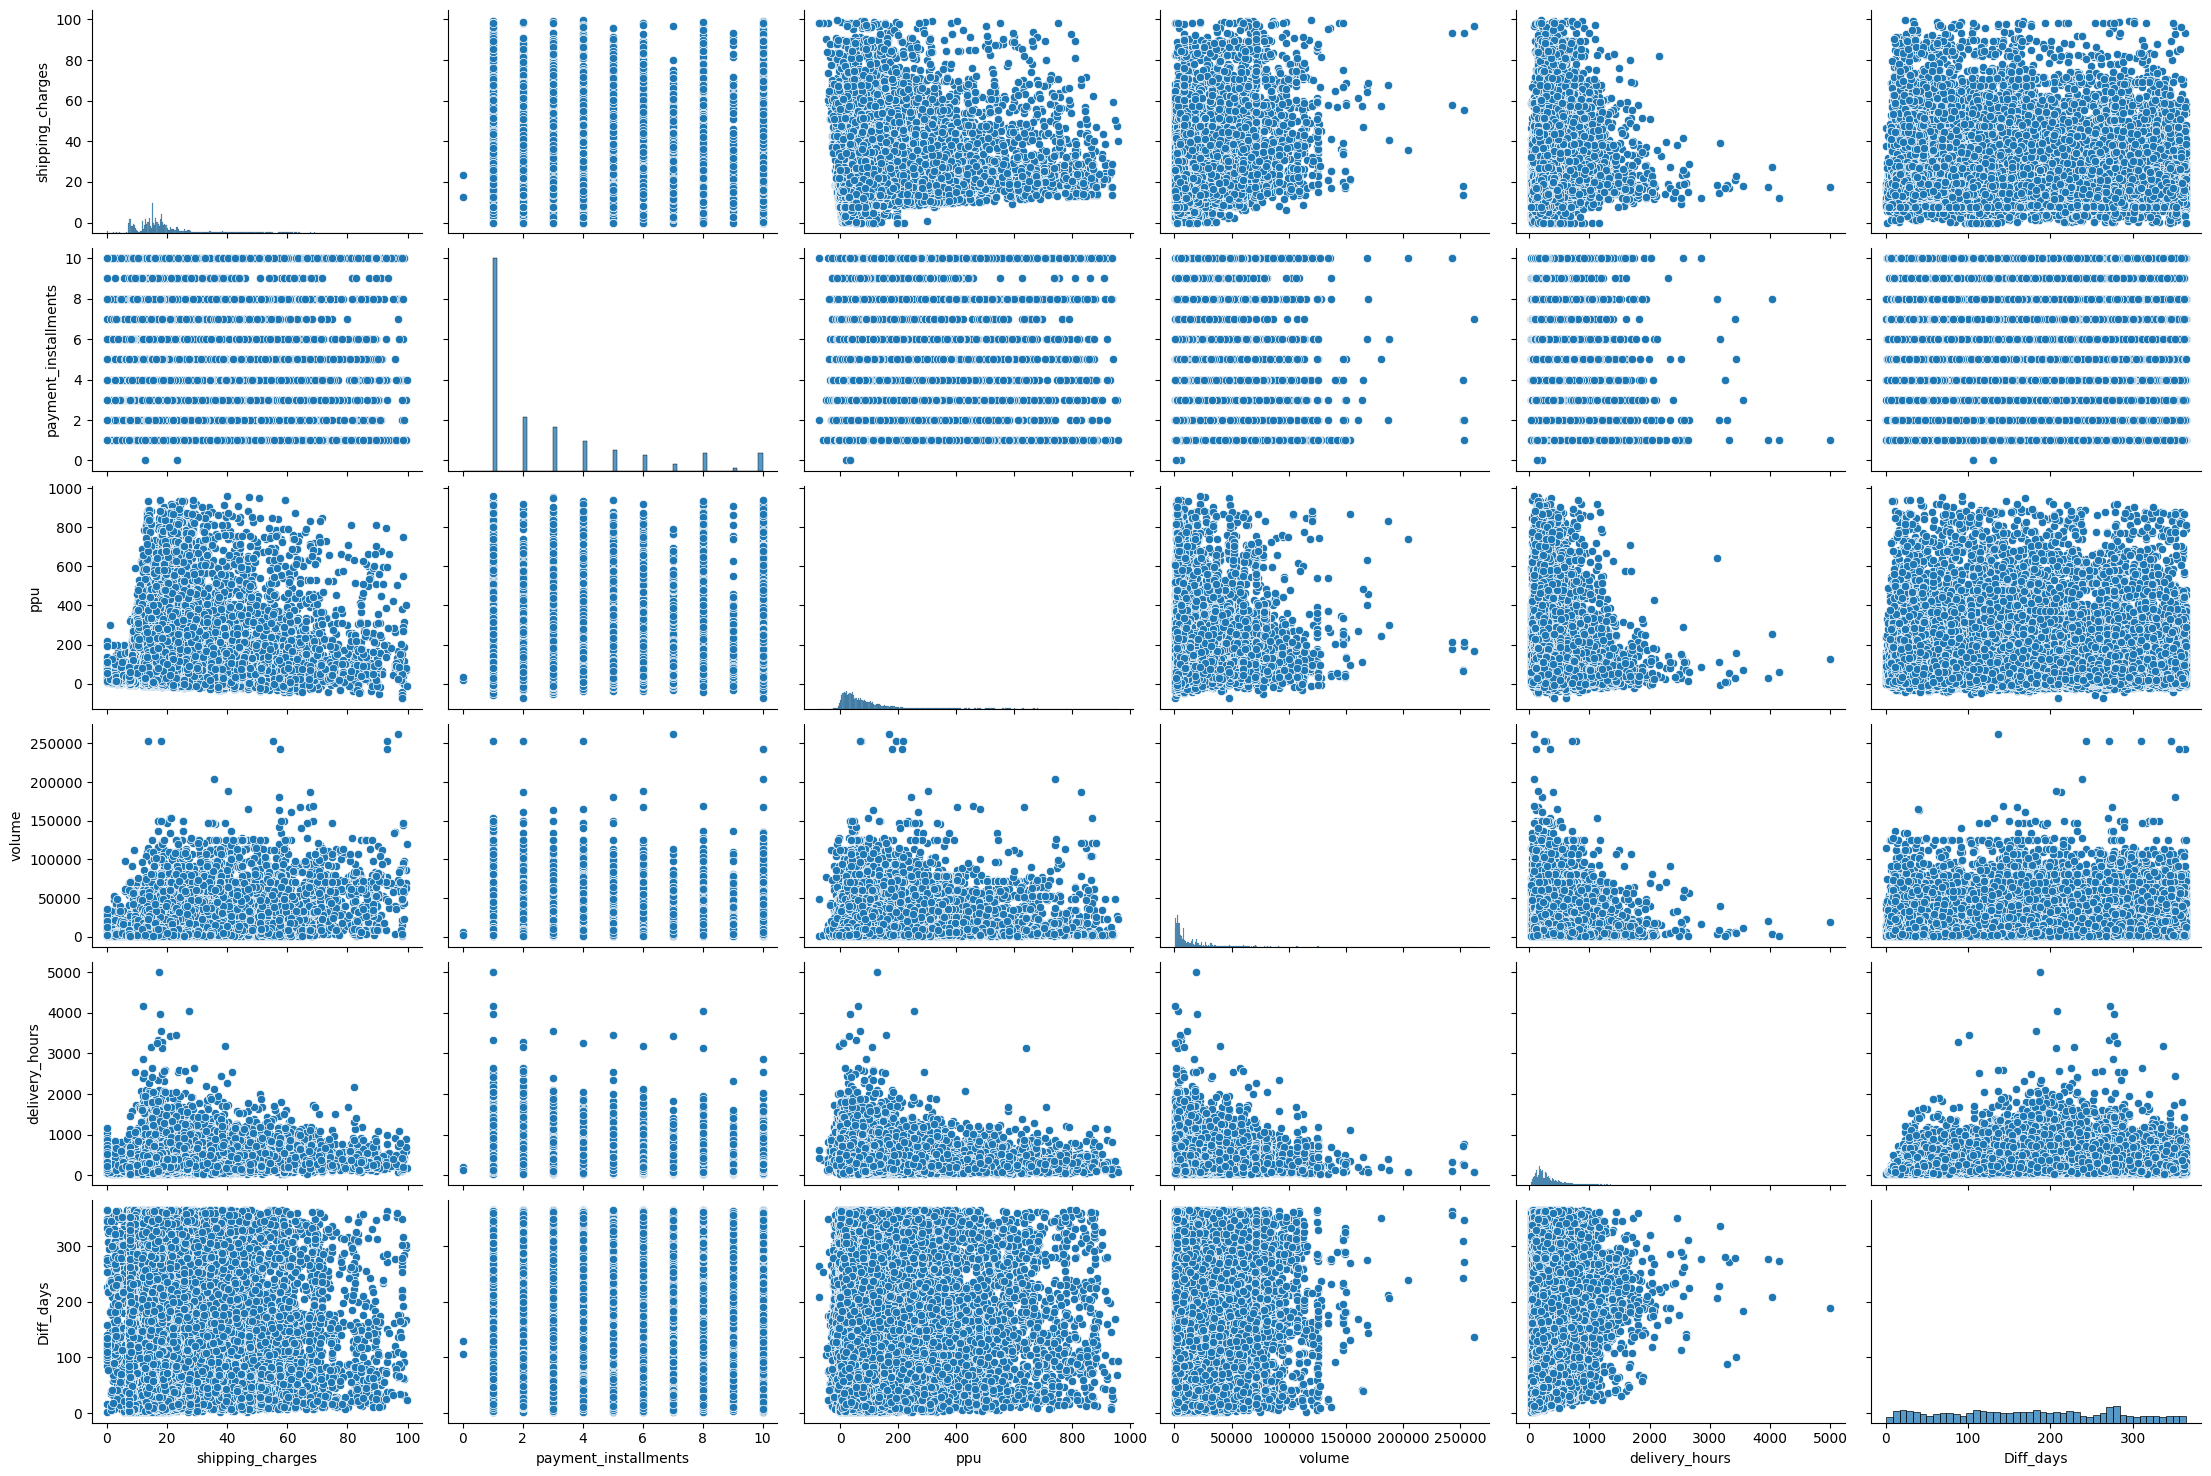

In [59]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(temp, aspect=1.5)
plt.show()

In [ ]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(merged_cleaned_df.drop('customer_id', axis=1), hue='category', aspect=1.5)
plt.show()

KeyboardInterrupt: 

# 군집분석

## 1. 분석 진행할 컬럼 선택, 범주형 데이터 인코딩

In [66]:
merged_cleaned_df.T

0      \
order_id                  00010242fe8c5a6d1ba2dd792cb16214   
payment_type                                   credit_card   
customer_id               871766c5855e863f6eccc05f988b23cb   
order_item_id                                            1   
product_id                4244733e06e7ecb4970a6e2683c13e61   
seller_id                 48436dade18ac8b2bce089ec2a041202   
shipping_charges                                     13.29   
payment_installments                                     2   
product_weight_g                                     650.0   
customer_zip_code_prefix                             28013   
customer_state                                          RJ   
total_payment                                        72.19   
ppu                                                  45.61   
volume                                              3528.0   
delivery_hours                                       182.0   
Diff_days                                              351   
category                                              toys   

                                                     1      \
order_id                  000229ec398224ef6ca0657da4fc703e   
payment_type                                   credit_card   
customer_id               3818d81c6709e39d06b2738a8d3a2474   
order_item_id                                            1   
product_id                c777355d18b72b67abbeef9df44fd0fd   
seller_id                 5b51032eddd242adc84c38acab88f23d   
shipping_charges                                     17.87   
payment_installments                                     5   
product_weight_g                                    3050.0   
customer_zip_code_prefix                             35661   
customer_state                                          MG   
total_payment                                       216.87   
ppu                                                 181.13   
volume                                             14157.0   
delivery_hours                                       190.0   
Diff_days                                              228   
category                                              toys   

                                                     2      \
order_id                  00024acbcdf0a6daa1e931b038114c75   
payment_type                                   credit_card   
customer_id               af861d436cfc08b2c2ddefd0ba074622   
order_item_id                                            1   
product_id                7634da152a4610f1595efa32f14722fc   
seller_id                 9d7a1d34a5052409006425275ba1c2b4   
shipping_charges                                     12.79   
payment_installments                                     2   
product_weight_g                                     200.0   
customer_zip_code_prefix                             12952   
customer_state                                          SP   
total_payment                                        25.78   
ppu                                                    0.2   
volume                                              2400.0   
delivery_hours                                       147.0   
Diff_days                                               22   
category                                              toys   

                                                     3      \
order_id                  00054e8431b9d7675808bcb819fb4a32   
payment_type                                   credit_card   
customer_id               635d9ac1680f03288e72ada3a1035803   
order_item_id                                            1   
product_id                8d4f2bb7e93e6710a28f34fa83ee7d28   
seller_id                 7040e82f899a04d1b434b795a43b4617   
shipping_charges                                     11.85   
payment_installments                                     1   
product_weight_g                                     200.0   
customer_zip_code_prefix                             16700   
customer_state      

In [31]:
# 클러스터링 할 컬럼 지정
#feature_names = ['payment_type','product_weight_g', 'total_payment', 'volume', 'category', 'Diff_days']
#feature_names = ['payment_type','Diff_days', 'total_payment', 'volume', 'category', 'Diff_days']
#feature_names = ['payment_type','product_weight_g', 'total_payment', 'volume', 'category', 'Diff_days']
#feature_names = ['product_weight_g', 'total_payment', 'volume', 'Diff_days']
#feature_names = ['Diff_days', 'shipping_charges', 'volume', 'delivery_hours']
#feature_names = ['Diff_days', 'volume', 'delivery_hours','ppu']
#feature_names = ['Diff_days', 'volume', 'delivery_hours','ppu']
feature_names = ['Diff_days', 'volume', 'delivery_hours','ppu','total_payment','product_weight_g','payment_installments','shipping_charges']
#feature_names = ['Diff_days', 'volume', 'delivery_hours','ppu','payment_installments','product_weight_g','shipping_charges']

#벡터기반 뉴클리드 거리 기반으로 속성 6개 따오는 거니까 컬럼 6개, pCA 6개 다르다
# 지정된 컬럼으로 새로운 dataframe 생성
#from sklearn.preprocessing import OneHotEncoder

#merged_df_f = pd.DataFrame(merged_cleaned_df , columns=feature_names)
#encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#columns_to_encode = ['category']

# 원-핫 인코딩 수행
#encoded_data = encoder.fit_transform(merged_df_f[columns_to_encode])

# 원-핫 인코딩된 컬럼 이름 생성
#encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# 결과를 DataFrame으로 변환
#encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# 기존 컬럼과 병합 (인코딩 제외한 나머지 컬럼 추가)
#merged_result = pd.concat([merged_df_f.drop(columns=columns_to_encode).reset_index(drop=True), encoded_df], axis=1)
merged_result = merged_cleaned_df[feature_names].reset_index(drop=True)

In [32]:
merged_result

Diff_days    volume  delivery_hours     ppu  total_payment  \
0            351    3528.0           182.0   45.61          72.19   
1            228   14157.0           190.0  181.13         216.87   
2             22    2400.0           147.0    0.20          25.78   
3            263    2700.0           202.0    8.05          31.75   
4             57  118125.0           121.0  739.25         880.75   
...          ...       ...             ...     ...            ...   
71989         72    5120.0           392.0   99.82         139.88   
71990        129   53400.0           416.0  256.58         343.40   
71991         47   44460.0           226.0  313.47         386.53   
71992        310    9576.0           115.0   82.95         116.85   
71993         81    1710.0           120.0   30.21          55.79   

       product_weight_g  payment_installments  shipping_charges  
0                 650.0                     2             13.29  
1                3050.0                     5             17.87  
2                 200.0                     2             12.79  
3                 200.0                     1             11.85  
4               13805.0                    10             70.75  
...                 ...                   ...               ...  
71989            1050.0                     3             20.03  
71990           10150.0                     1             43.41  
71991            8950.0                     1             36.53  
71992             967.0                     3             16.95  
71993             600.0                     1             12.79  

[71994 rows x 8 columns]

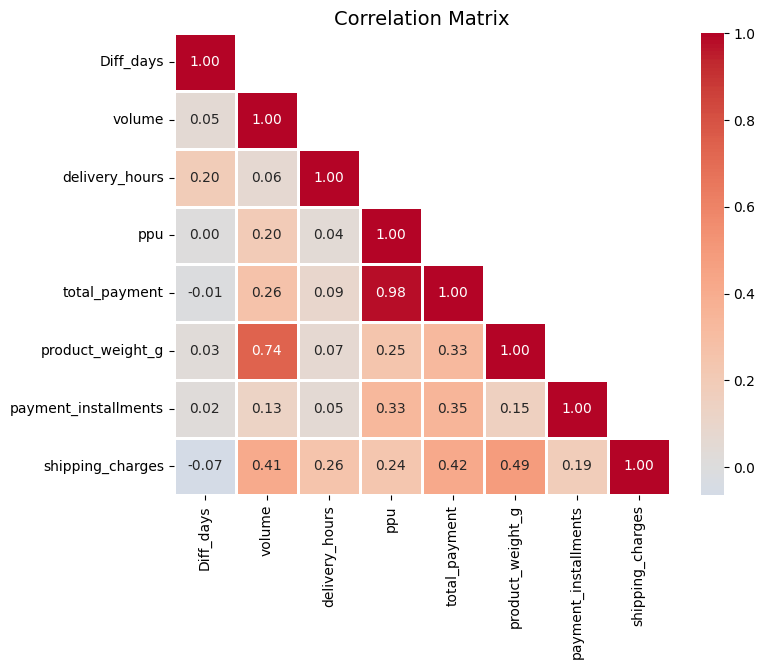

In [33]:
corr = merged_result.corr()

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap with the default colormap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

## 2. 수치형 변수 스케일링

In [70]:
# StandardScaler 초기화 및 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_result)

# 스케일링 결과를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=merged_result.columns, index=merged_result.index)

print('feature 들의 평균 값')
print(scaled_df.mean())
print('feature 들의 분산 값')
print(scaled_df.var())

feature 들의 평균 값
Diff_days              -9.869472e-18
volume                  4.816302e-17
delivery_hours          5.566382e-17
ppu                     1.500160e-17
payment_installments    5.447948e-17
product_weight_g        4.184656e-17
shipping_charges       -1.328431e-16
dtype: float64
feature 들의 분산 값
Diff_days               1.000014
volume                  1.000014
delivery_hours          1.000014
ppu                     1.000014
payment_installments    1.000014
product_weight_g        1.000014
shipping_charges        1.000014
dtype: float64


### 정규 분포 모양 비교
- PCA와 같은 기법은 데이터가 표준화되고 정규 분포에 가까울수록 성능이 좋아질 수 있습니다. 하지만 모든 분석이 정규 분포를 요구하지는 않습니다.
- 예를 들어, 비지도 학습(클러스터링)에서는 데이터의 절대 크기보다는 상대적 차이가 더 중요할 수 있습니다.


/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_24823/2365387471.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x0, kde=False, rug=False, fit =scipy.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)
/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_24823/2365387471.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gi

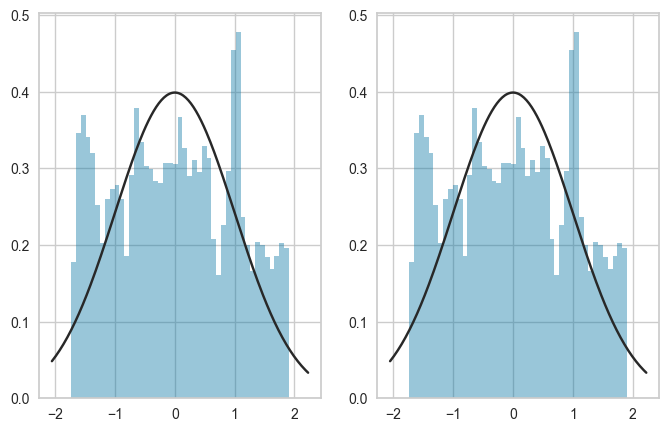

In [71]:
import scipy
# 각 값들의 정규 분포 모양 비교
f,ax = plt.subplots(1,2,figsize=(8,5))

# 표준화 전 정규분포
x0 = scaled_df['Diff_days'].dropna().values
sns.distplot(x0, kde=False, rug=False, fit =scipy.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)

# 표준화 이후 정규 분포
x1 = scaled_df['Diff_days'].values
sns.distplot(x1, kde=False, rug=False, fit =scipy.stats.norm, ax = ax[1])
plt.show()

In [ ]:
# check Z score
df_Zscore = pd.DataFrame()
outlier_dict = {}
outlier_idx_list = []

for one_col in scaled_df.columns:
    print("Check",one_col)
    df_Zscore[f'{one_col}_Zscore'] = scipy.stats.zscore(scaled_df[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>2)
                                                    |(df_Zscore[f'{one_col}_Zscore']<-2)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))
    if len(outlier_dict[one_col]):
        print(one_col,'Has outliers\n', outlier_dict[one_col])
    else:
        print(one_col,"Has Not outlier")
    print()


print("Before", scaled_df.shape)
all_outlier_idx = sum(outlier_idx_list,[])
df_droped = scaled_df.drop(all_outlier_idx)
print("After (drop outlier)", df_droped.shape)

Check Diff_days
Diff_days Has Not outlier

Check volume
volume Has outliers
 4        6.282021
17       2.606368
39       2.180387
65       2.204218
90       2.639136
           ...   
71933    4.696954
71963    2.819061
71966    4.070195
71978    2.819061
71990    2.425847
Name: volume_Zscore, Length: 3848, dtype: float64

Check delivery_hours
delivery_hours Has outliers
 45       2.004557
56       3.158950
58       4.002545
73       4.433222
76       2.399714
           ...   
71883    2.337555
71907    2.040076
71936    2.324235
71944    3.998105
71979    2.741592
Name: delivery_hours_Zscore, Length: 3164, dtype: float64

Check ppu
ppu Has outliers
 4        5.966450
12       4.942967
23       2.601311
41       2.493634
49       3.507303
           ...   
71851    3.187665
71862    7.271140
71935    5.954434
71946    2.278922
71991    2.061275
Name: ppu_Zscore, Length: 3122, dtype: float64

Check payment_installments
payment_installments Has outliers
 4        2.926329
63       2.92

In [73]:
#reset_index안해서 아직 살아있음
df_droped

Diff_days    volume  delivery_hours       ppu  payment_installments  \
0       1.767165 -0.545418       -0.526228 -0.395487             -0.293301   
1       0.536938  0.087835       -0.490708  0.847477              0.914060   
2      -1.523444 -0.612621       -0.681627 -0.811979             -0.293301   
3       0.887002 -0.594748       -0.437429 -0.739980             -0.695755   
5      -0.113183 -0.412440       -0.273150  0.417961              0.109152   
...          ...       ...             ...       ...                   ...   
71987  -0.223203 -0.621558        0.481646 -0.851968             -0.695755   
71988   1.317082 -0.608808        0.912323 -0.622948             -0.695755   
71989  -1.023351 -0.450570        0.406166  0.101717              0.109152   
71992   1.357089 -0.185091       -0.823706 -0.053011              0.109152   
71993  -0.933334 -0.653730       -0.801506 -0.536733             -0.695755   

       product_weight_g  shipping_charges  
0             -0.398171         -0.499374  
1              0.551158         -0.093133  
2             -0.576170         -0.543724  
3             -0.576170         -0.627101  
5              0.135827         -0.644841  
...                 ...               ...  
71987         -0.576170          0.278516  
71988         -0.516837          1.354436  
71989         -0.239950          0.098457  
71992         -0.272781         -0.174736  
71993         -0.417949         -0.543724  

[55390 rows x 7 columns]

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
#scaler = MinMaxScaler(feature_range=(0, 1))

# 먼저 fit()을 호출하여 scaler에 데이터를 학습시킴
#scaler.fit(df_droped)

# 그 후 transform()을 사용하여 데이터를 변환
#df_scaled = scaler.transform(df_droped)

# transform()으로 반환된 데이터는 numpy ndarry 형식이므로 DataFrame으로 변환
#df_scaled = pd.DataFrame(data=df_scaled, columns=scaled_df.columns)

# 변환된 feature들의 최소, 최대 값 출력
#print('feature들의 최소 값')
#print(df_scaled.min())

#print('\nfeature들의 최대 값')
#print(df_scaled.max())

feature들의 최소 값
Diff_days         0.0
volume            0.0
delivery_hours    0.0
ppu               0.0
dtype: float64

feature들의 최대 값
Diff_days         1.0
volume            1.0
delivery_hours    1.0
ppu               1.0
dtype: float64


In [74]:
# 스케일링된 데이터와 원핫 인코딩된 데이터 병합
#final_result = pd.concat([scaled_df, merged_result[encoded_columns]], axis=1)
#final_result = pd.concat([scaled_df, merged_result[encoded_columns]], axis=1)

#final_result = df_scaled
final_result = df_droped
final_result.T # 최종 결과 출력 (전치하여 확인)

#클러스터 번호 나왔을 건데. 이 데이터 프레임의 맨 마지막 컬럼에 클러스터 번호를 붙여주세요

0         1         2         3         5      \
Diff_days             1.767165  0.536938 -1.523444  0.887002 -0.113183   
volume               -0.545418  0.087835 -0.612621 -0.594748 -0.412440   
delivery_hours       -0.526228 -0.490708 -0.681627 -0.437429 -0.273150   
ppu                  -0.395487  0.847477 -0.811979 -0.739980  0.417961   
payment_installments -0.293301  0.914060 -0.293301 -0.695755  0.109152   
product_weight_g     -0.398171  0.551158 -0.576170 -0.576170  0.135827   
shipping_charges     -0.499374 -0.093133 -0.543724 -0.627101 -0.644841   

                         6         7         8         9         10     ...  \
Diff_days            -1.153375 -0.163192 -1.413423 -1.383418  0.226880  ...   
volume               -0.646760  0.287004 -0.587837  0.435948  0.424033  ...   
delivery_hours       -1.107865 -0.903626 -0.179910 -0.659427  0.011009  ...   
ppu                  -0.423186 -0.345042 -0.520132 -0.348986 -0.478767  ...   
payment_installments -0.695755  0.109152  0.914060  0.511606 -0.695755  ...   
product_weight_g     -0.319060 -0.279505 -0.576170 -0.108230 -0.002617  ...   
shipping_charges     -0.667016 -0.890537 -0.526871  0.390277 -0.492278  ...   

                         71980     71981     71982     71983     71985  \
Diff_days            -1.283399  0.376908  1.747162 -1.173379  1.047032   
volume               -0.584024 -0.278986 -0.638836 -0.706993 -0.165788   
delivery_hours        0.024329 -0.357509 -0.663867 -1.050145 -0.832586   
ppu                  -0.333761  0.205175  0.857016 -0.724755 -0.097770   
payment_installments  0.109152 -0.695755  0.109152  0.511606 -0.695755   
product_weight_g     -0.358616  1.144489 -0.595948 -0.516837 -0.358616   
shipping_charges     -0.431963 -0.010642 -0.185380 -0.322863 -0.628875   

                         71987     71988     71989     71992     71993  
Diff_days            -0.223203  1.317082 -1.023351  1.357089 -0.933334  
volume               -0.621558 -0.608808 -0.450570 -0.185091 -0.653730  
delivery_hours        0.481646  0.912323  0.406166 -0.823706 -0.801506  
ppu                  -0.851968 -0.622948  0.101717 -0.053011 -0.536733  
payment_installments -0.695755 -0.695755  0.109152  0.109152 -0.695755  
product_weight_g     -0.576170 -0.516837 -0.239950 -0.272781 -0.417949  
shipping_charges      0.278516  1.354436  0.098457 -0.174736 -0.543724  

[7 rows x 55390 columns]

## 3. PCA 진행

In [ ]:
from sklearn.decomposition import PCA

# 주성분 개수를 판단하기 위한 pca임의 시행
pca = PCA(n_components=3)
pca.fit(final_result)

# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지
pca.explained_variance_ratio_.sum()

0.7067322333750925

In [79]:
# pca 시행
pca_df = pca.fit_transform(final_result)
#pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2'])
#pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3'])

# Show the first 5 firms
pca_df.head()

PC1       PC2       PC3
0  1.575493 -0.884289 -0.334131
1  0.574557  0.928241 -1.415753
2 -1.644789 -0.501589  0.222246
3  0.717488 -1.033578  0.158281
4 -0.100383  0.165101 -0.524976

## scree plot으로 초기 K값 참고

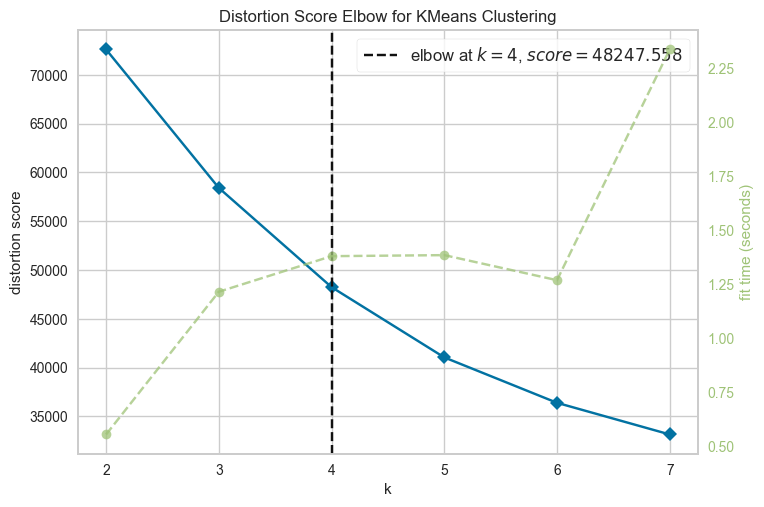

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
# k-means 알고리즘 활용을 위한 라이브러리 import
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# 초기 k 값 참고를 위한 scree plot 을 그리고, 군집이 나뉘는 시간까지 고려한 k 값 확인
model = KMeans(n_init= 20, random_state=42)

# k 값의 범위를 조정해 줄 수 있습니다.
visualizer = KElbowVisualizer(model, k=(2,8))

# 데이터 적용
visualizer.fit(pca_df)
visualizer.show()

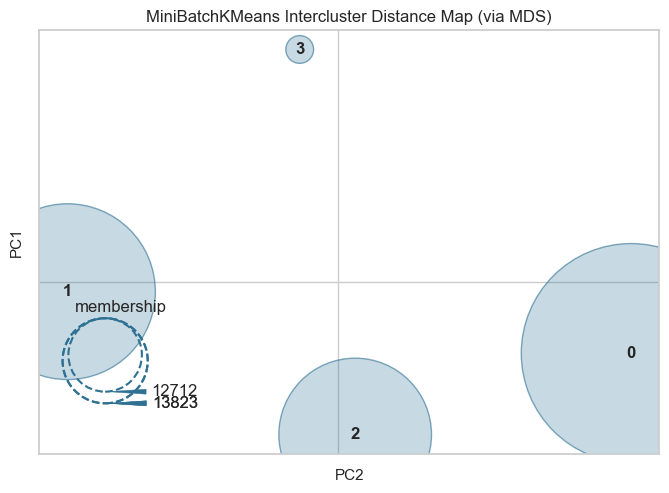

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=4, random_state=42))

In [81]:
# 초기 k 값 참고를 위한 distance map 라이브러리 import
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans

#그룹의 갯수를 지정해 줄 수 있습니다. 저는 7로 적어두었습니다.
intercluster_distance(MiniBatchKMeans(4, random_state=42), pca_df)

In [ ]:
# KMEANS
# 군집개수(n_cluster)는 7,초기 중심 설정방식 랜덤,
kmeans = KMeans(n_clusters=4, random_state=42, init='random')

# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

# 클러스터 번호 가져오기
labels = kmeans.labels_

# 이제 pca_df의 마지막 컬럼(Cluster)에는 각 데이터 포인트가 속한 클러스터 번호가 포함되어 있습니다.
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)

# PCA 데이터프레임에 클러스터 번호 추가
pca_df['Cluster'] = labels

In [83]:
pca_df

PC1       PC2       PC3  Cluster
0      1.575493 -0.884289 -0.334131        1
1      0.574557  0.928241 -1.415753        2
2     -1.644789 -0.501589  0.222246        3
3      0.717488 -1.033578  0.158281        1
4     -0.100383  0.165101 -0.524976        2
...         ...       ...       ...      ...
55385 -0.071103  0.072471  1.160050        0
55386  1.570991  0.621810  1.337247        0
55387 -0.789369  0.829207  0.432618        3
55388  1.166278 -0.357849 -0.853473        1
55389 -1.114027 -0.677024  0.088539        3

[55390 rows x 4 columns]

In [84]:
pca_df

PC1       PC2       PC3  Cluster
0      1.575493 -0.884289 -0.334131        1
1      0.574557  0.928241 -1.415753        2
2     -1.644789 -0.501589  0.222246        3
3      0.717488 -1.033578  0.158281        1
4     -0.100383  0.165101 -0.524976        2
...         ...       ...       ...      ...
55385 -0.071103  0.072471  1.160050        0
55386  1.570991  0.621810  1.337247        0
55387 -0.789369  0.829207  0.432618        3
55388  1.166278 -0.357849 -0.853473        1
55389 -1.114027 -0.677024  0.088539        3

[55390 rows x 4 columns]

In [85]:
# 군집별 비중 확인
clusters = pca_df['Cluster'].value_counts().to_dict()

for i,j in clusters.items():
    print("{} : {}%".format(i,round(j/len(pca_df)*100,2)))

3 : 36.89%
1 : 30.14%
0 : 19.3%
2 : 13.66%


In [27]:
final_result.columns

NameError: name 'final_result' is not defined

In [86]:
final_result.T

0         1         2         3         5      \
Diff_days             1.767165  0.536938 -1.523444  0.887002 -0.113183   
volume               -0.545418  0.087835 -0.612621 -0.594748 -0.412440   
delivery_hours       -0.526228 -0.490708 -0.681627 -0.437429 -0.273150   
ppu                  -0.395487  0.847477 -0.811979 -0.739980  0.417961   
payment_installments -0.293301  0.914060 -0.293301 -0.695755  0.109152   
product_weight_g     -0.398171  0.551158 -0.576170 -0.576170  0.135827   
shipping_charges     -0.499374 -0.093133 -0.543724 -0.627101 -0.644841   

                         6         7         8         9         10     ...  \
Diff_days            -1.153375 -0.163192 -1.413423 -1.383418  0.226880  ...   
volume               -0.646760  0.287004 -0.587837  0.435948  0.424033  ...   
delivery_hours       -1.107865 -0.903626 -0.179910 -0.659427  0.011009  ...   
ppu                  -0.423186 -0.345042 -0.520132 -0.348986 -0.478767  ...   
payment_installments -0.695755  0.109152  0.914060  0.511606 -0.695755  ...   
product_weight_g     -0.319060 -0.279505 -0.576170 -0.108230 -0.002617  ...   
shipping_charges     -0.667016 -0.890537 -0.526871  0.390277 -0.492278  ...   

                         71980     71981     71982     71983     71985  \
Diff_days            -1.283399  0.376908  1.747162 -1.173379  1.047032   
volume               -0.584024 -0.278986 -0.638836 -0.706993 -0.165788   
delivery_hours        0.024329 -0.357509 -0.663867 -1.050145 -0.832586   
ppu                  -0.333761  0.205175  0.857016 -0.724755 -0.097770   
payment_installments  0.109152 -0.695755  0.109152  0.511606 -0.695755   
product_weight_g     -0.358616  1.144489 -0.595948 -0.516837 -0.358616   
shipping_charges     -0.431963 -0.010642 -0.185380 -0.322863 -0.628875   

                         71987     71988     71989     71992     71993  
Diff_days            -0.223203  1.317082 -1.023351  1.357089 -0.933334  
volume               -0.621558 -0.608808 -0.450570 -0.185091 -0.653730  
delivery_hours        0.481646  0.912323  0.406166 -0.823706 -0.801506  
ppu                  -0.851968 -0.622948  0.101717 -0.053011 -0.536733  
payment_installments -0.695755 -0.695755  0.109152  0.109152 -0.695755  
product_weight_g     -0.576170 -0.516837 -0.239950 -0.272781 -0.417949  
shipping_charges      0.278516  1.354436  0.098457 -0.174736 -0.543724  

[7 rows x 55390 columns]

<Axes: >

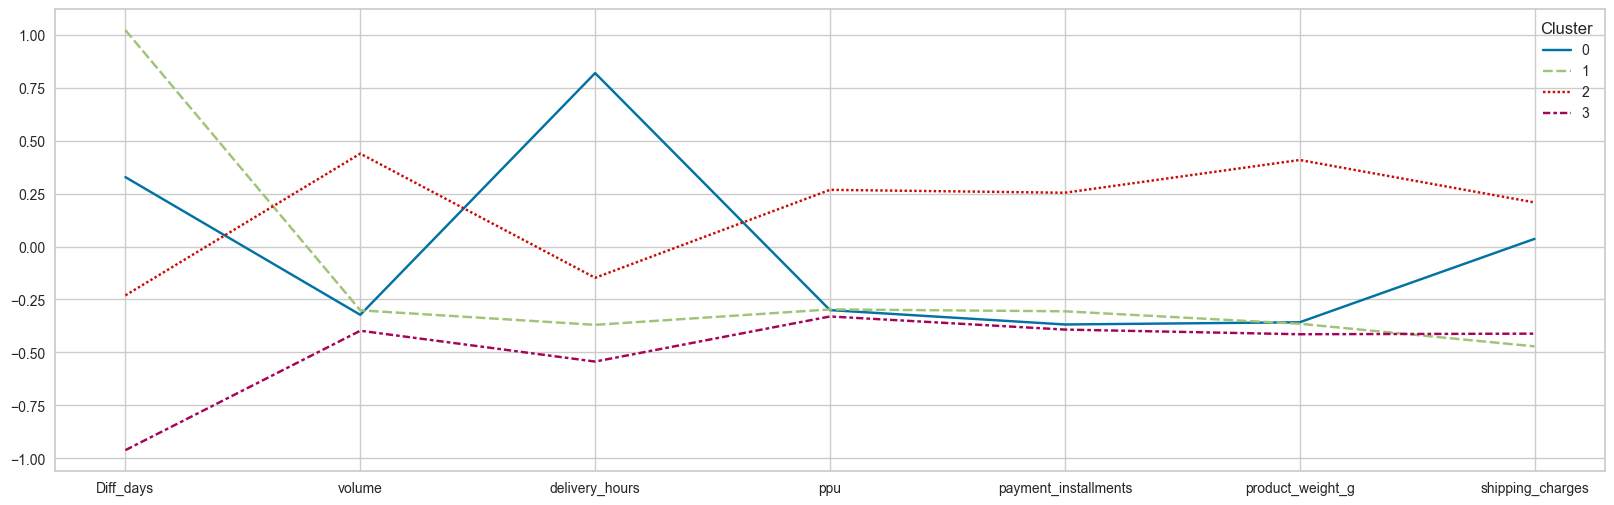

In [87]:
# 수치형 컬럼만 클러스터별로 groupby mean
numeric_result = final_result
numeric_result.loc[:,'Cluster'] = labels
numeric_result_mean =numeric_result.groupby(['Cluster']).mean(numeric_only=True)

plt.figure(figsize=(20,6))
sns.lineplot(numeric_result_mean.T)

In [88]:
## 범주형 컬럼만 클러스터별로 groupby mean
#newmeric = list(set(feature_names) - set(columns_to_encode))
#categorical_result = final_result.drop(columns=newmeric)
#categorical_result['Cluster'] = labels
#categorical_result_mean =categorical_result.groupby(['Cluster']).mean(numeric_only=True)
#plt.figure(figsize=(20,6))
#plt.xticks(rotation=90)
#sns.lineplot(categorical_result_mean.T)

In [89]:
final_result.T

0         1         2         3         5      \
Diff_days             1.767165  0.536938 -1.523444  0.887002 -0.113183   
volume               -0.545418  0.087835 -0.612621 -0.594748 -0.412440   
delivery_hours       -0.526228 -0.490708 -0.681627 -0.437429 -0.273150   
ppu                  -0.395487  0.847477 -0.811979 -0.739980  0.417961   
payment_installments -0.293301  0.914060 -0.293301 -0.695755  0.109152   
product_weight_g     -0.398171  0.551158 -0.576170 -0.576170  0.135827   
shipping_charges     -0.499374 -0.093133 -0.543724 -0.627101 -0.644841   
Cluster               1.000000  2.000000  3.000000  1.000000  2.000000   

                         6         7         8         9         10     ...  \
Diff_days            -1.153375 -0.163192 -1.413423 -1.383418  0.226880  ...   
volume               -0.646760  0.287004 -0.587837  0.435948  0.424033  ...   
delivery_hours       -1.107865 -0.903626 -0.179910 -0.659427  0.011009  ...   
ppu                  -0.423186 -0.345042 -0.520132 -0.348986 -0.478767  ...   
payment_installments -0.695755  0.109152  0.914060  0.511606 -0.695755  ...   
product_weight_g     -0.319060 -0.279505 -0.576170 -0.108230 -0.002617  ...   
shipping_charges     -0.667016 -0.890537 -0.526871  0.390277 -0.492278  ...   
Cluster               3.000000  3.000000  3.000000  2.000000  1.000000  ...   

                         71980     71981     71982     71983     71985  \
Diff_days            -1.283399  0.376908  1.747162 -1.173379  1.047032   
volume               -0.584024 -0.278986 -0.638836 -0.706993 -0.165788   
delivery_hours        0.024329 -0.357509 -0.663867 -1.050145 -0.832586   
ppu                  -0.333761  0.205175  0.857016 -0.724755 -0.097770   
payment_installments  0.109152 -0.695755  0.109152  0.511606 -0.695755   
product_weight_g     -0.358616  1.144489 -0.595948 -0.516837 -0.358616   
shipping_charges     -0.431963 -0.010642 -0.185380 -0.322863 -0.628875   
Cluster               3.000000  2.000000  1.000000  3.000000  1.000000   

                         71987     71988     71989     71992     71993  
Diff_days            -0.223203  1.317082 -1.023351  1.357089 -0.933334  
volume               -0.621558 -0.608808 -0.450570 -0.185091 -0.653730  
delivery_hours        0.481646  0.912323  0.406166 -0.823706 -0.801506  
ppu                  -0.851968 -0.622948  0.101717 -0.053011 -0.536733  
payment_installments -0.695755 -0.695755  0.109152  0.109152 -0.695755  
product_weight_g     -0.576170 -0.516837 -0.239950 -0.272781 -0.417949  
shipping_charges      0.278516  1.354436  0.098457 -0.174736 -0.543724  
Cluster               0.000000  0.000000  3.000000  1.000000  3.000000  

[8 rows x 55390 columns]

In [90]:
# reset_index 안 해서 살아있음
df_droped

Diff_days    volume  delivery_hours       ppu  payment_installments  \
0       1.767165 -0.545418       -0.526228 -0.395487             -0.293301   
1       0.536938  0.087835       -0.490708  0.847477              0.914060   
2      -1.523444 -0.612621       -0.681627 -0.811979             -0.293301   
3       0.887002 -0.594748       -0.437429 -0.739980             -0.695755   
5      -0.113183 -0.412440       -0.273150  0.417961              0.109152   
...          ...       ...             ...       ...                   ...   
71987  -0.223203 -0.621558        0.481646 -0.851968             -0.695755   
71988   1.317082 -0.608808        0.912323 -0.622948             -0.695755   
71989  -1.023351 -0.450570        0.406166  0.101717              0.109152   
71992   1.357089 -0.185091       -0.823706 -0.053011              0.109152   
71993  -0.933334 -0.653730       -0.801506 -0.536733             -0.695755   

       product_weight_g  shipping_charges  Cluster  
0             -0.398171         -0.499374        1  
1              0.551158         -0.093133        2  
2             -0.576170         -0.543724        3  
3             -0.576170         -0.627101        1  
5              0.135827         -0.644841        2  
...                 ...               ...      ...  
71987         -0.576170          0.278516        0  
71988         -0.516837          1.354436        0  
71989         -0.239950          0.098457        3  
71992         -0.272781         -0.174736        1  
71993         -0.417949         -0.543724        3  

[55390 rows x 8 columns]

In [91]:
df_droped.loc[:,'Cluster'] = kmeans.labels_  # 클러스터링 결과를 df_droped에 추가

# 원본 데이터 크기에 맞춰 재구성
merged_result['Cluster'] = None  # 원본 데이터에 Cluster 컬럼 추가
merged_result.loc[df_droped.index, 'Cluster'] = df_droped['Cluster']  # 인덱스 기준으로 클러스터링 결과 매핑
merged_result = merged_result[merged_result['Cluster'].notnull()].reset_index(drop=True)
merged_result

Diff_days   volume  delivery_hours     ppu  payment_installments  \
0            351   3528.0           182.0   45.61                     2   
1            228  14157.0           190.0  181.13                     5   
2             22   2400.0           147.0    0.20                     2   
3            263   2700.0           202.0    8.05                     1   
4            163   5760.0           239.0  134.30                     3   
...          ...      ...             ...     ...                   ...   
55385        152   2250.0           409.0   -4.16                     1   
55386        306   2464.0           506.0   20.81                     1   
55387         72   5120.0           392.0   99.82                     3   
55388        310   9576.0           115.0   82.95                     3   
55389         81   1710.0           120.0   30.21                     1   

       product_weight_g  shipping_charges Cluster  
0                 650.0             13.29       1  
1                3050.0             17.87       2  
2                 200.0             12.79       3  
3                 200.0             11.85       1  
4                2000.0             11.65       2  
...                 ...               ...     ...  
55385             200.0             22.06       0  
55386             350.0             34.19       0  
55387            1050.0             20.03       3  
55388             967.0             16.95       1  
55389             600.0             12.79       3  

[55390 rows x 8 columns]

# Version 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def perform_kmeans_clustering(data, k_range, feature_names, random_state=42):
    """
    KMeans 클러스터링을 k값의 범위에 대해 반복 수행하고 결과를 시각화.
    Parameters:
        data (pd.DataFrame): 클러스터링에 사용할 데이터셋.
        k_range (range): 클러스터 개수의 범위 (예: range(3, 7)).
        feature_names (list): 클러스터링에 사용할 컬럼 목록.
        random_state (int): KMeans의 랜덤 시드.
    Returns:
        results (dict): 각 k값에 대한 결과 저장.
    """

    results = {}

    for k in k_range:
        print(f"K={k}에 대한 클러스터링 진행 중...")
        # KMeans 클러스터링
        kmeans = KMeans(n_clusters=k, random_state=random_state, init='random')
        labels = kmeans.fit_predict(data)
        # 결과 저장
        results[k] = {
            'kmeans_model': kmeans,
            'labels': labels,
            'cluster_centers': kmeans.cluster_centers_
        }

        # 클러스터링 결과 시각화
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x='PC1', y='PC2', hue=labels, palette='tab10')
        plt.title(f'Clusters with K={k}')
        plt.legend(title='Cluster')
        plt.show()

        cluster_counts = pd.Series(labels).value_counts(normalize=True) * 100
        print("군집별 비중:")
        for cluster, proportion in cluster_counts.items():
            print(f"Cluster {cluster}: {proportion:.2f}%")

        # 클러스터 별 평균 계산
        clustered_data = pd.DataFrame(scaled_data, columns=feature_names)
        clustered_data['Cluster'] = labels
        cluster_means = clustered_data.groupby('Cluster').mean()
        # 평균 값 시각화
        
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=cluster_means.T)
        plt.title(f'Cluster Means for K={k}')
        plt.xticks(rotation=90)
        plt.show()
    return results

In [102]:
merged_result.T

0        1       2       3       4       5      \
Diff_days                351      228      22     263     163      59   
volume                3528.0  14157.0  2400.0  2700.0  5760.0  1827.0   
delivery_hours         182.0    190.0   147.0   202.0   239.0    51.0   
ppu                    45.61   181.13     0.2    8.05   134.3   42.59   
payment_installments       2        5       2       1       3       1   
product_weight_g       650.0   3050.0   200.0   200.0  2000.0   850.0   
shipping_charges       13.29    17.87   12.79   11.85   11.65    11.4   
Cluster                    1        2       3       1       2       3   

                        6       7        8        9      ...   55380   55381  \
Diff_days                 158      33       36      197  ...      46     212   
volume                17500.0  2816.0  20000.0  19800.0  ...  2880.0  8000.0   
delivery_hours           97.0   260.0    152.0    303.0  ...   306.0   220.0   
ppu                     51.11   32.02    50.68    36.53  ...   52.34   111.1   
payment_installments        3       5        4        1  ...       3       1   
product_weight_g        950.0   200.0   1383.0   1650.0  ...   750.0  4550.0   
shipping_charges         8.88   12.98    23.32    13.37  ...   14.05    18.8   
Cluster                     3       3        2        1  ...       3       2   

                       55382  55383   55384   55385   55386   55387   55388  \
Diff_days                349     57     279     152     306      72     310   
volume                1960.0  816.0  9900.0  2250.0  2464.0  5120.0  9576.0   
delivery_hours         151.0   64.0   113.0   409.0   506.0   392.0   115.0   
ppu                   182.17   9.71   78.07   -4.16   20.81   99.82   82.95   
payment_installments       3      4       1       1       1       3       3   
product_weight_g       150.0  350.0   750.0   200.0   350.0  1050.0   967.0   
shipping_charges       16.83  15.28   11.83   22.06   34.19   20.03   16.95   
Cluster                    1      3       1       0       0       3       1   

                       55389  
Diff_days                 81  
volume                1710.0  
delivery_hours         120.0  
ppu                    30.21  
payment_installments       1  
product_weight_g       600.0  
shipping_charges       12.79  
Cluster                    3  

[8 rows x 55390 columns]

In [105]:
pca_df

PC1       PC2       PC3  Cluster
0      1.575493 -0.884289 -0.334131        1
1      0.574557  0.928241 -1.415753        2
2     -1.644789 -0.501589  0.222246        3
3      0.717488 -1.033578  0.158281        1
4     -0.100383  0.165101 -0.524976        2
...         ...       ...       ...      ...
55385 -0.071103  0.072471  1.160050        0
55386  1.570991  0.621810  1.337247        0
55387 -0.789369  0.829207  0.432618        3
55388  1.166278 -0.357849 -0.853473        1
55389 -1.114027 -0.677024  0.088539        3

[55390 rows x 4 columns]

In [116]:
def perform_kmeans_clustering(data, k_range, feature_names, random_state=42):
    """
    KMeans 클러스터링을 k값의 범위에 대해 반복 수행하고 결과를 시각화.
    Parameters:
        data (pd.DataFrame): 클러스터링에 사용할 데이터셋.
        k_range (range): 클러스터 개수의 범위 (예: range(3, 7)).
        feature_names (list): 클러스터링에 사용할 컬럼 목록.
        random_state (int): KMeans의 랜덤 시드.
    Returns:
        results (dict): 각 k값에 대한 결과 저장.
    """
    
    results = {}

    for k in k_range:
        print(f"K={k}에 대한 클러스터링 진행 중...")
        # KMeans 클러스터링
        kmeans = KMeans(n_clusters=k, random_state=random_state, init='random')
        labels = kmeans.fit_predict(data)
        # 결과 저장
        results[k] = {
            'kmeans_model': kmeans,
            'labels': labels,
            'cluster_centers': kmeans.cluster_centers_
        }

        # 클러스터링 결과 시각화
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x='PC1', y='PC2',z = 'PC3', hue=labels, palette='tab10')
        plt.title(f'Clusters with K={k}')
        plt.legend(title='Cluster')
        plt.show()


        cluster_counts = pd.Series(labels).value_counts(normalize=True) * 100
        print("군집별 비중:")
        for cluster, proportion in cluster_counts.items():
            print(f"Cluster {cluster}: {proportion:.2f}%")


        # 클러스터 별 평균 계산
        clustered_data = pd.DataFrame(scaled_data, columns=feature_names)
        clustered_data['Cluster'] = labels
        cluster_means = clustered_data.groupby('Cluster').mean()

        # 평균 값 시각화
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=cluster_means.T)
        plt.title(f'Cluster Means for K={k}')
        plt.xticks(rotation=90)
        plt.show()
    return results


K=3에 대한 클러스터링 진행 중...


AttributeError: PathCollection.set() got an unexpected keyword argument 'z'

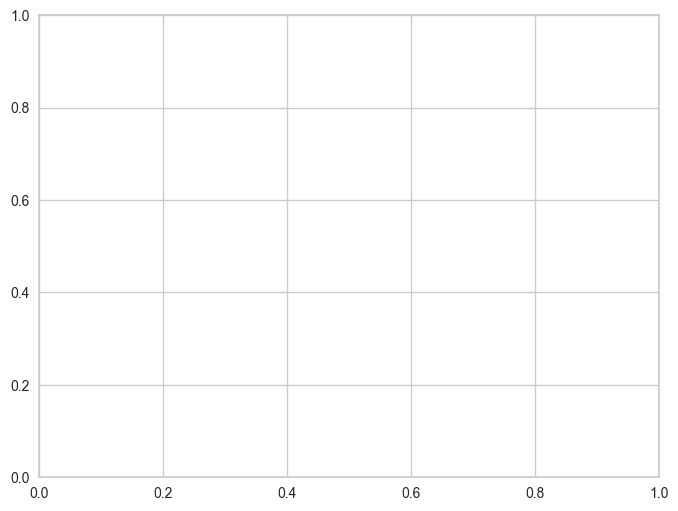

In [117]:
perform_kmeans_clustering(pca_df, range(3, 5), feature_names=['Diff_days', 'volume', 'delivery_hours','ppu'], random_state=42)

# version 2

In [139]:
scaled_data

array([[ 1.76716532, -0.54541766, -0.52622811, ..., -0.2933015 ,
        -0.39817123, -0.49937436],
       [ 0.5369377 ,  0.08783495, -0.49070832, ...,  0.91406001,
         0.55115815, -0.09313263],
       [-1.52344353, -0.61262144, -0.68162717, ..., -0.2933015 ,
        -0.57617048, -0.54372389],
       ...,
       [-1.27339727,  1.89322152, -0.33086928, ..., -0.69575533,
         2.88492621,  1.56199197],
       [ 1.35708945, -0.18509103, -0.82370632, ...,  0.10915234,
        -0.27278064, -0.17473577],
       [-0.93333434, -0.65373013, -0.80150645, ..., -0.69575533,
        -0.41794892, -0.54372389]])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import itertools
def perform_kmeans_clustering(data, k_range, feature_names, random_state=42):
    """
    KMeans 클러스터링을 k값의 범위에 대해 반복 수행하고, feature_names의 가능한 모든 조합에 대해 실행.
    Parameters:
        data (pd.DataFrame): 클러스터링에 사용할 데이터셋.
        k_range (range): 클러스터 개수의 범위 (예: range(3, 7)).
        feature_names (list): 클러스터링에 사용할 컬럼 목록.
        random_state (int): KMeans의 랜덤 시드.
    Returns:
        results (dict): 각 k값과 feature 조합에 대한 결과 저장.
    """
    # 결과 저장용 딕셔너리
    results = {}
    # feature_names의 모든 조합을 생성
    feature_combinations = []
    for r in range(3, len(feature_names) + 1):  # 최소 3개의 feature부터 모든 조합
        feature_combinations.extend(itertools.combinations(feature_names, r))
    # 각 feature 조합에 대해 반복 수행
    for features in feature_combinations:
        print(f"Features: {features}에 대해 클러스터링 진행 중...")
        
        # MinMaxScaler 스케일링
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data[list(features)])
        # PCA 적용 전, feature 개수가 2개 이상일 때만 PCA 수행
        if len(features) > 1:
            # PCA 변환
            pca = PCA(n_components=2)
            pca_data = pca.fit_transform(scaled_data)
            pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
            pca_applied = True
        else:
            pca_df = pd.DataFrame(scaled_data, columns=features)
            pca_applied = False
        for k in k_range:
            print(f"K={k}에 대한 클러스터링 진행 중...")
            # KMeans 클러스터링
            kmeans = KMeans(n_clusters=k, random_state=random_state, init='random')
            labels = kmeans.fit_predict(pca_df)
            # 결과 저장
            if features not in results:
                results[features] = {}
            results[features][k] = {
                'kmeans_model': kmeans,
                'labels': labels,
                'cluster_centers': kmeans.cluster_centers_
            }
            # 클러스터링 결과 시각화
            plt.figure(figsize=(8, 6))
            if pca_applied:
                sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=labels, palette='tab10')
            else:
                sns.scatterplot(data=pca_df, x=features[0], y=features[0], hue=labels, palette='tab10')
            plt.title(f'Clusters with K={k} for Features {features}')
            plt.legend(title='Cluster')
            plt.show()

            # 군집별 비중 계산
            cluster_counts = pd.Series(labels).value_counts(normalize=True) * 100
            print("군집별 비중:")
            for cluster, proportion in cluster_counts.items():
                print(f"Cluster {cluster}: {proportion:.2f}%")  



            # 클러스터 별 평균 계산
            clustered_data = pd.DataFrame(scaled_data, columns=features)
            clustered_data['Cluster'] = labels
            cluster_means = clustered_data.groupby('Cluster').mean()
            # 평균 값 시각화
            plt.figure(figsize=(10, 6))
            sns.lineplot(data=cluster_means.T)
            plt.title(f'Cluster Means for K={k} for Features {features}')
            plt.xticks(rotation=90)
            plt.show()
    return results

In [137]:
merged_result

Diff_days   volume  delivery_hours     ppu  payment_installments  \
0            351   3528.0           182.0   45.61                     2   
1            228  14157.0           190.0  181.13                     5   
2             22   2400.0           147.0    0.20                     2   
3            263   2700.0           202.0    8.05                     1   
4            163   5760.0           239.0  134.30                     3   
...          ...      ...             ...     ...                   ...   
55385        152   2250.0           409.0   -4.16                     1   
55386        306   2464.0           506.0   20.81                     1   
55387         72   5120.0           392.0   99.82                     3   
55388        310   9576.0           115.0   82.95                     3   
55389         81   1710.0           120.0   30.21                     1   

       product_weight_g  shipping_charges Cluster  
0                 650.0             13.29       1  
1                3050.0             17.87       2  
2                 200.0             12.79       3  
3                 200.0             11.85       1  
4                2000.0             11.65       2  
...                 ...               ...     ...  
55385             200.0             22.06       0  
55386             350.0             34.19       0  
55387            1050.0             20.03       3  
55388             967.0             16.95       1  
55389             600.0             12.79       3  

[55390 rows x 8 columns]

Features: ('Diff_days', 'volume', 'delivery_hours')에 대해 클러스터링 진행 중...
K=3에 대한 클러스터링 진행 중...


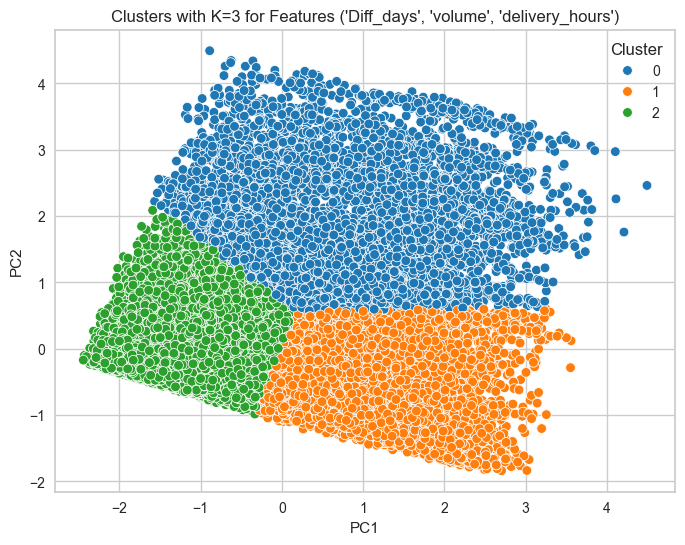

군집별 비중:
Cluster 2: 43.06%
Cluster 1: 40.52%
Cluster 0: 16.42%


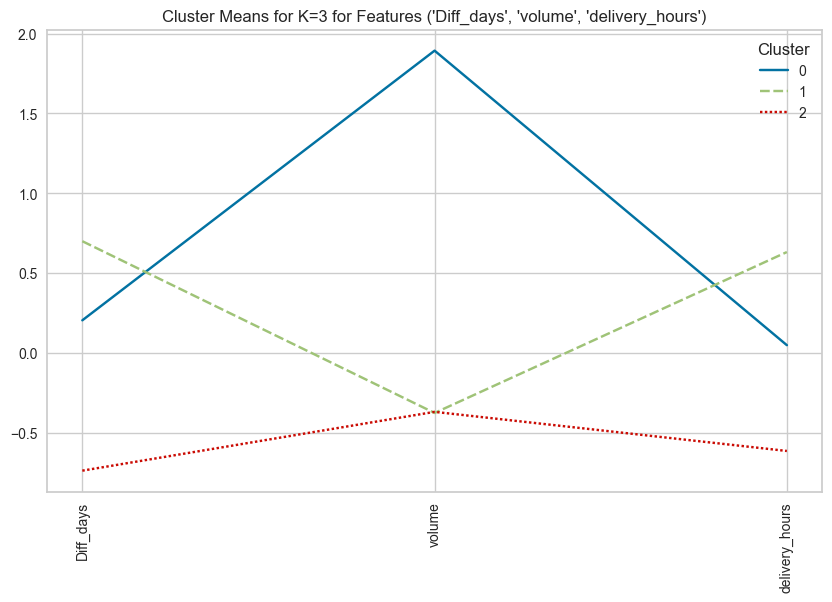

K=4에 대한 클러스터링 진행 중...


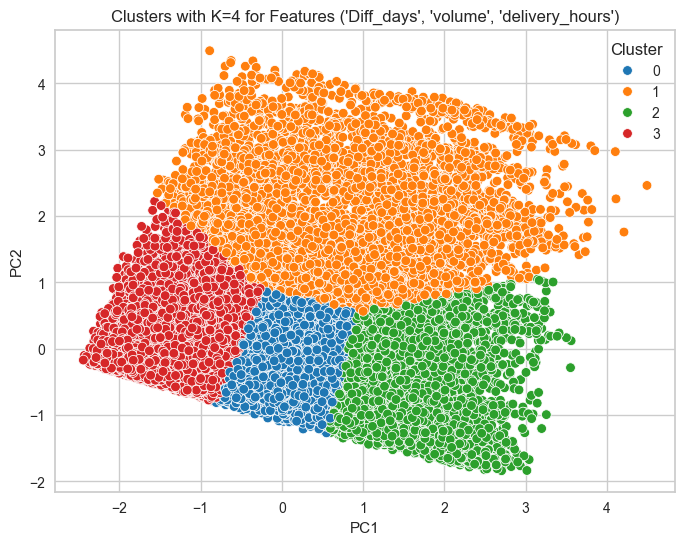

군집별 비중:
Cluster 0: 32.36%
Cluster 3: 32.00%
Cluster 2: 20.50%
Cluster 1: 15.15%


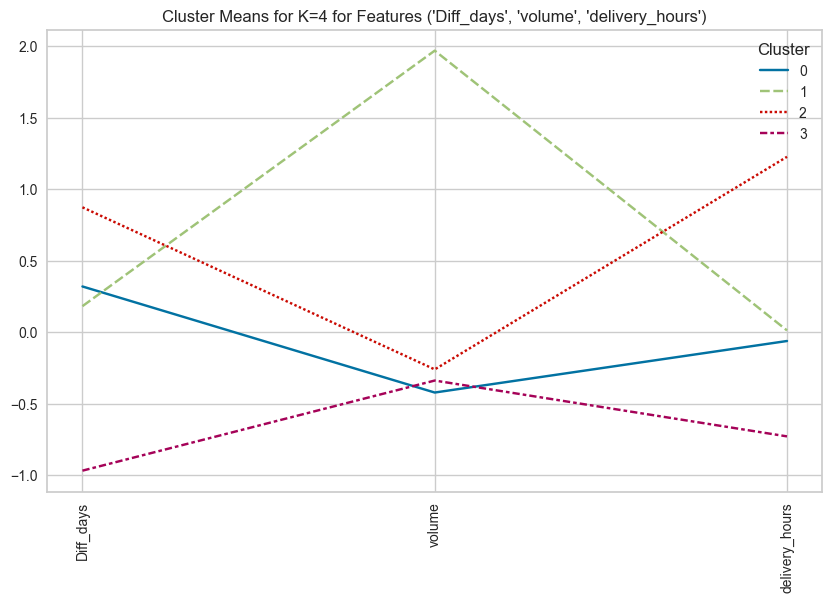

Features: ('Diff_days', 'volume', 'ppu')에 대해 클러스터링 진행 중...
K=3에 대한 클러스터링 진행 중...


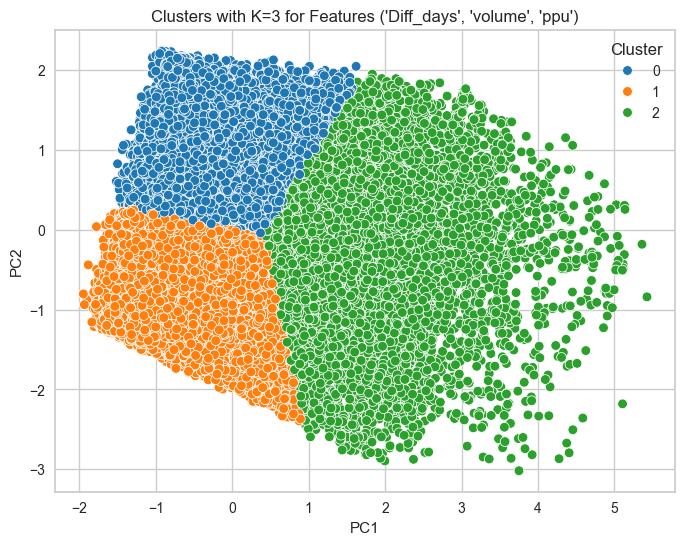

군집별 비중:
Cluster 1: 40.60%
Cluster 0: 37.68%
Cluster 2: 21.72%


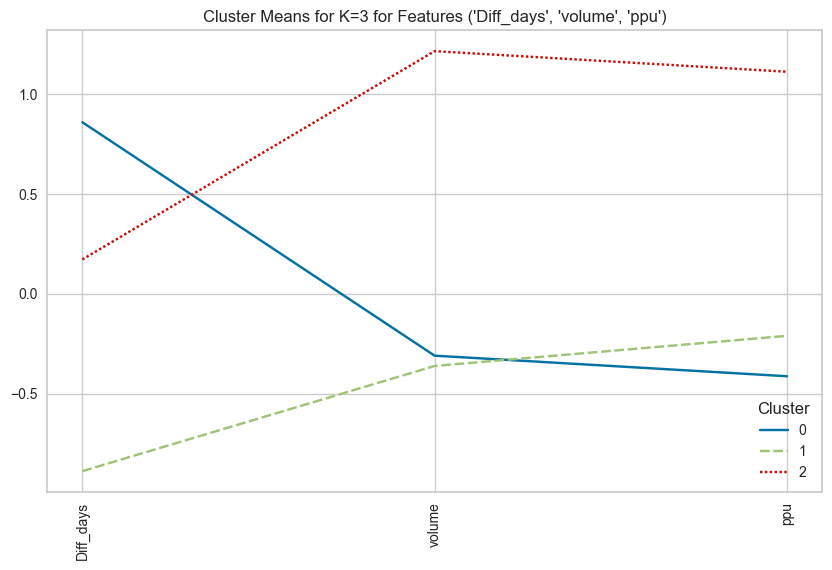

K=4에 대한 클러스터링 진행 중...


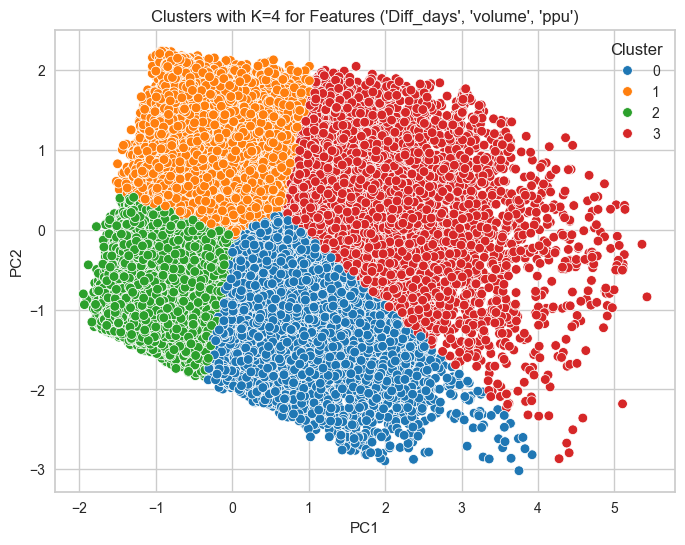

군집별 비중:
Cluster 1: 34.79%
Cluster 2: 31.07%
Cluster 0: 19.97%
Cluster 3: 14.18%


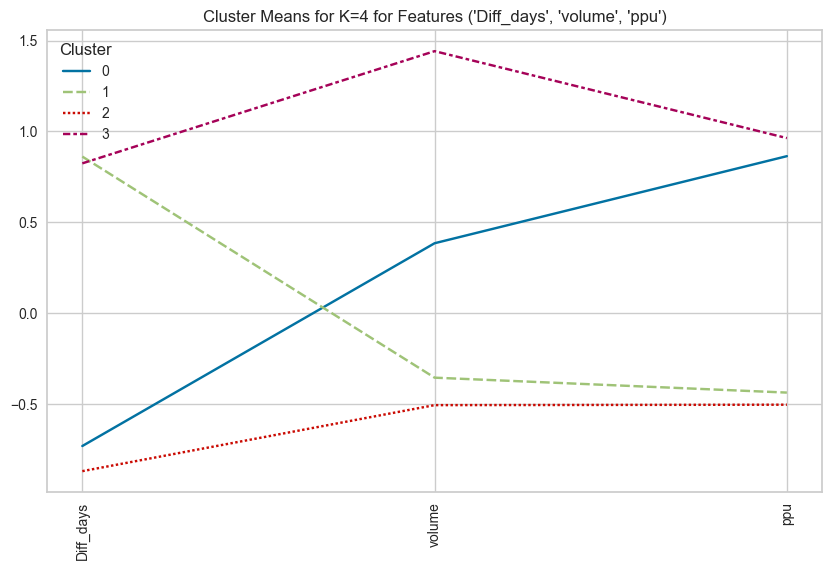

Features: ('Diff_days', 'delivery_hours', 'ppu')에 대해 클러스터링 진행 중...
K=3에 대한 클러스터링 진행 중...


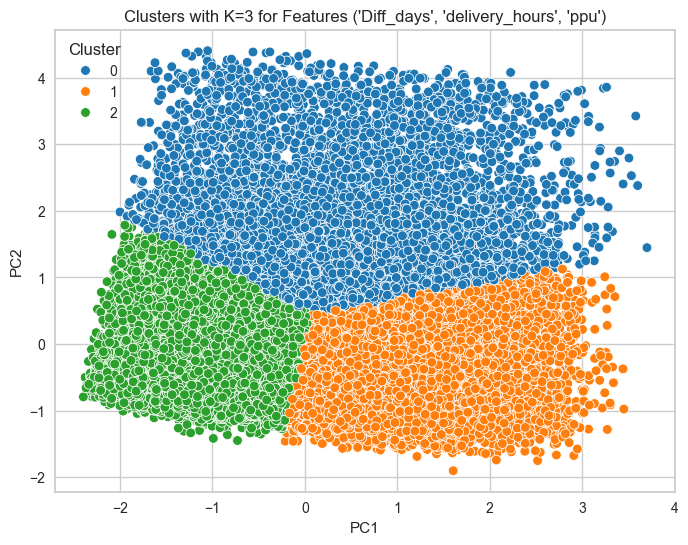

군집별 비중:
Cluster 2: 41.65%
Cluster 1: 40.90%
Cluster 0: 17.45%


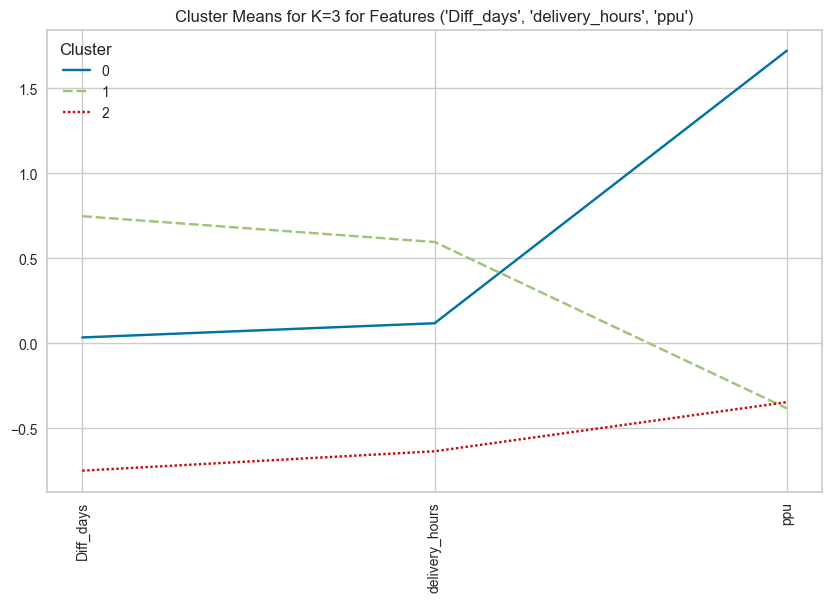

K=4에 대한 클러스터링 진행 중...


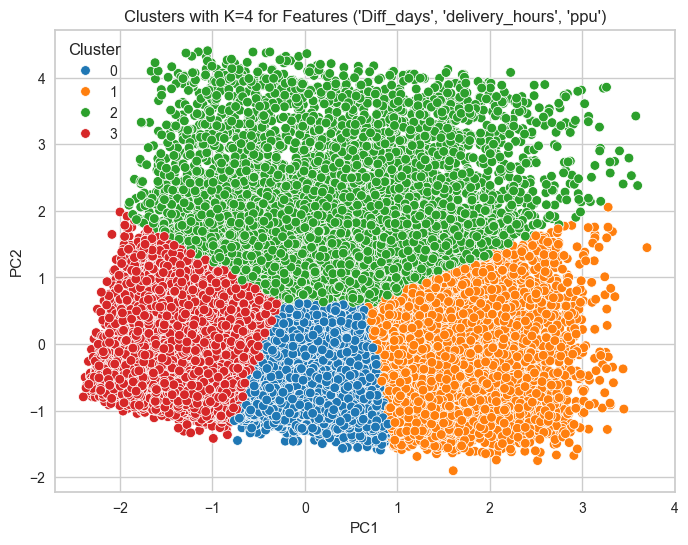

군집별 비중:
Cluster 3: 32.00%
Cluster 0: 31.06%
Cluster 1: 20.67%
Cluster 2: 16.27%


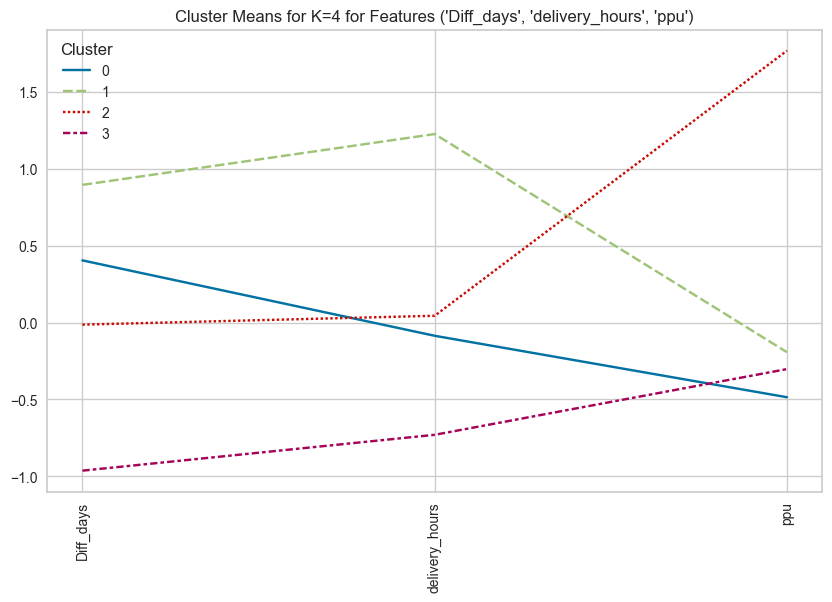

Features: ('volume', 'delivery_hours', 'ppu')에 대해 클러스터링 진행 중...
K=3에 대한 클러스터링 진행 중...


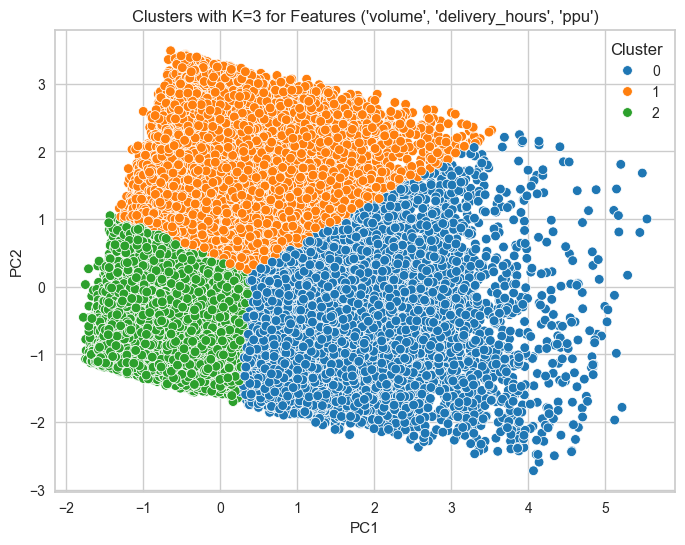

군집별 비중:
Cluster 2: 52.53%
Cluster 0: 24.94%
Cluster 1: 22.52%


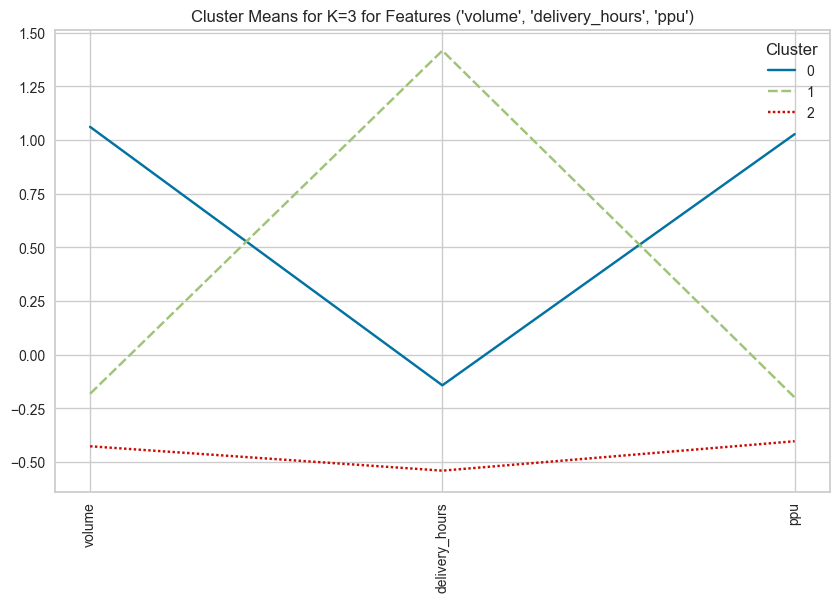

K=4에 대한 클러스터링 진행 중...


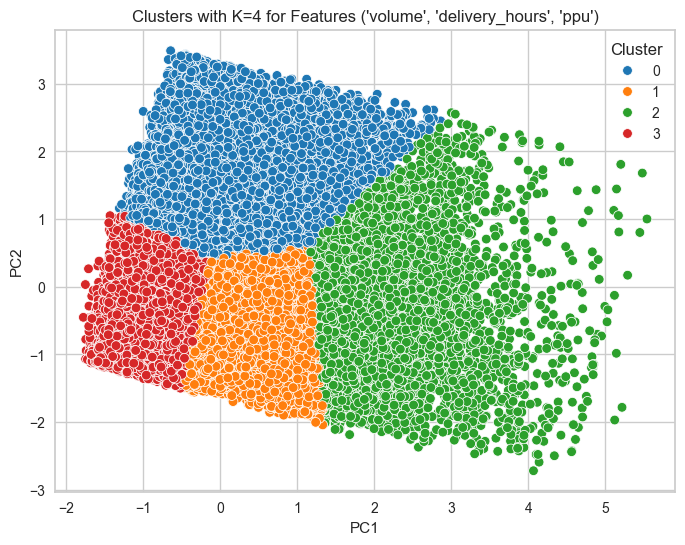

군집별 비중:
Cluster 3: 40.40%
Cluster 1: 26.39%
Cluster 0: 20.91%
Cluster 2: 12.30%


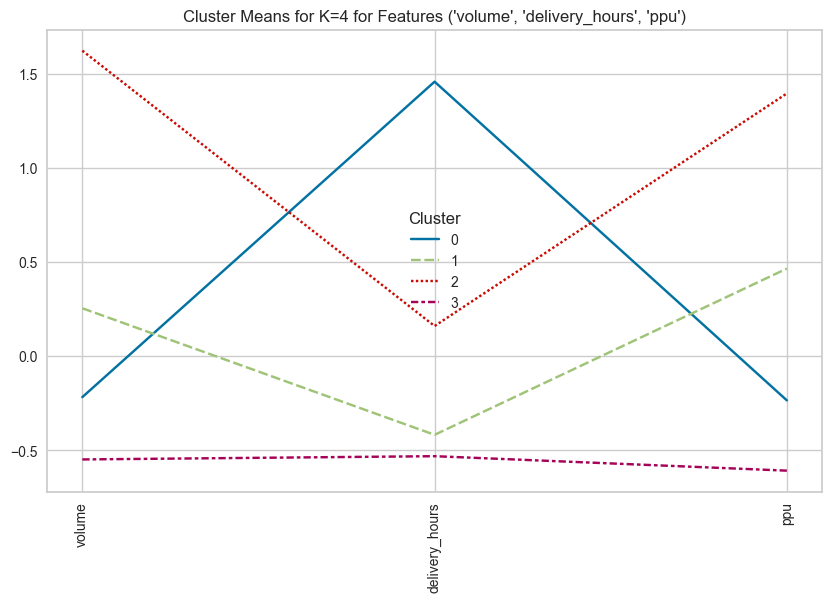

Features: ('Diff_days', 'volume', 'delivery_hours', 'ppu')에 대해 클러스터링 진행 중...
K=3에 대한 클러스터링 진행 중...


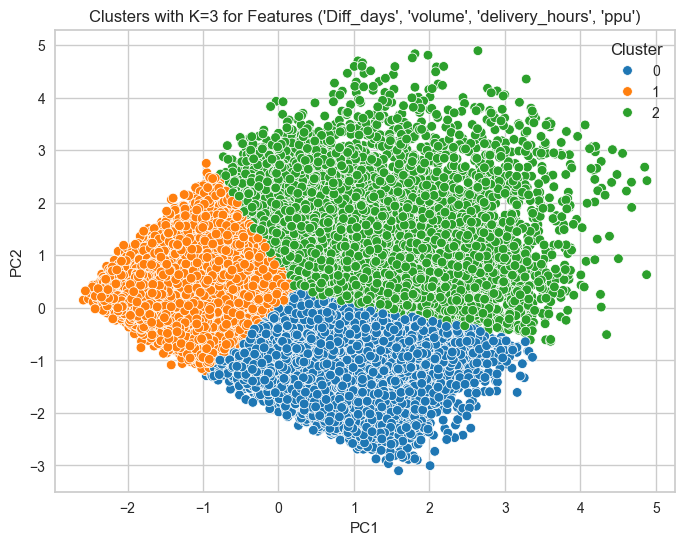

군집별 비중:
Cluster 1: 40.47%
Cluster 0: 37.86%
Cluster 2: 21.67%


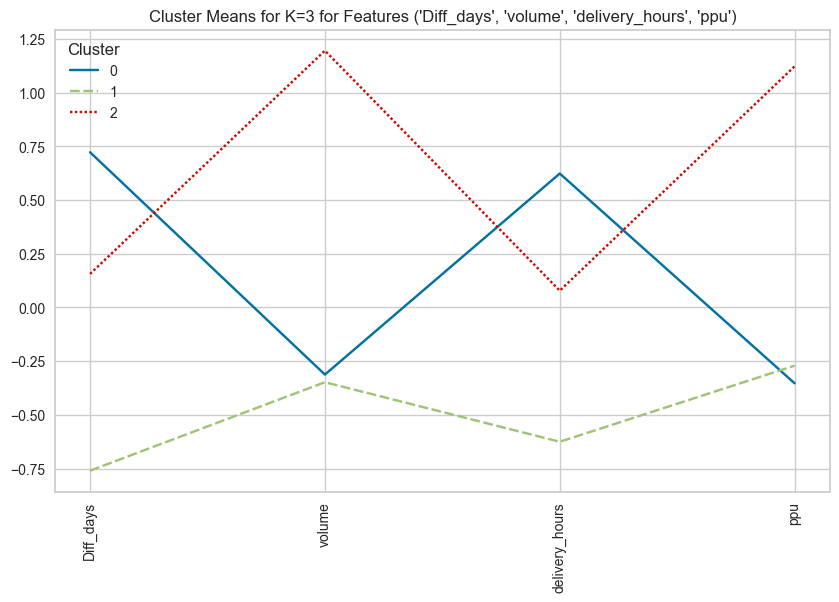

K=4에 대한 클러스터링 진행 중...


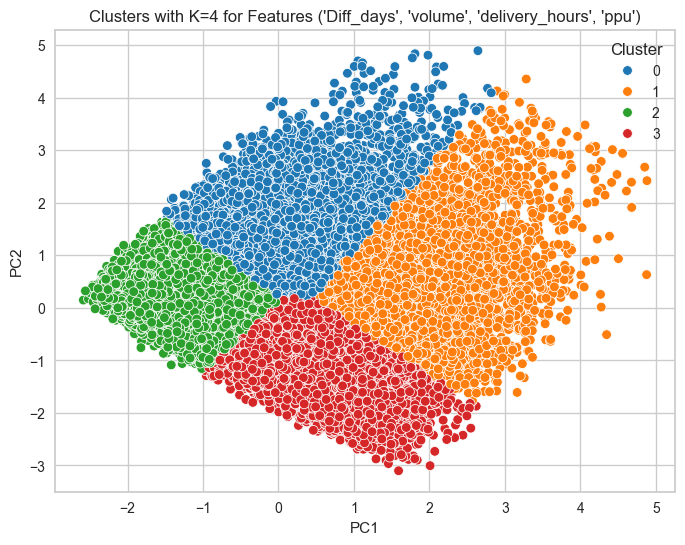

군집별 비중:
Cluster 3: 33.92%
Cluster 2: 32.79%
Cluster 0: 17.69%
Cluster 1: 15.60%


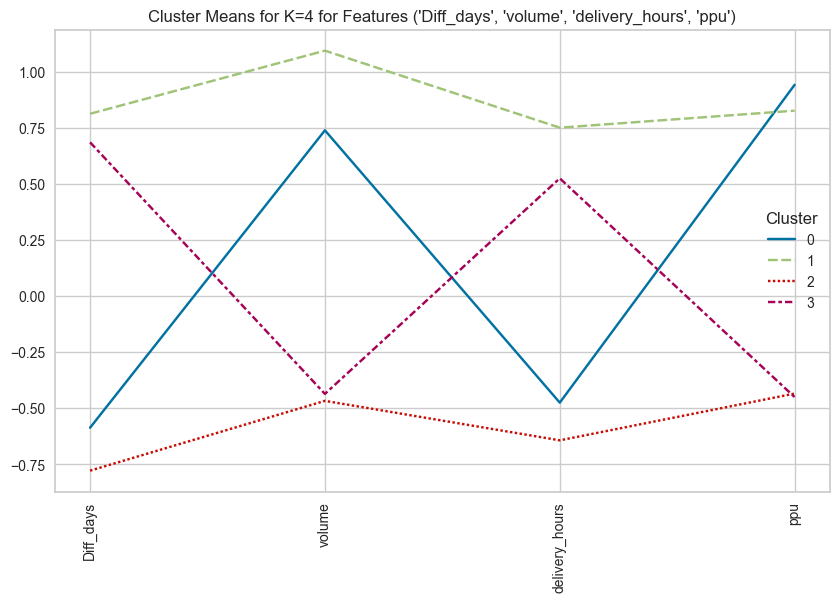

{('Diff_days',
  'volume',
  'delivery_hours'): {3: {'kmeans_model': KMeans(init='random', n_clusters=3, random_state=42),
   'labels': array([1, 0, 2, ..., 2, 1, 2], dtype=int32),
   'cluster_centers': array([[ 0.73285632,  1.75828289],
          [ 0.78870577, -0.63284731],
          [-1.02187311, -0.0744924 ]])}, 4: {'kmeans_model': KMeans(init='random', n_clusters=4, random_state=42),
   'labels': array([2, 0, 3, ..., 0, 0, 3], dtype=int32),
   'cluster_centers': array([[ 0.05142083, -0.4380028 ],
          [ 0.71507215,  1.84246584],
          [ 1.33821907, -0.70428395],
          [-1.24775969,  0.02108716]])}},
 ('Diff_days',
  'volume',
  'ppu'): {3: {'kmeans_model': KMeans(init='random', n_clusters=3, random_state=42),
   'labels': array([0, 2, 1, ..., 1, 0, 1], dtype=int32),
   'cluster_centers': array([[-0.27277044,  0.95634153],
          [-0.62296011, -0.75630479],
          [ 1.63169396, -0.24372738]])}, 4: {'kmeans_model': KMeans(init='random', n_clusters=4, random_state=4

In [138]:
perform_kmeans_clustering(merged_result, range(3, 5), feature_names = ['Diff_days', 'volume', 'delivery_hours','ppu'], random_state=42)

In [140]:
merged_result

Diff_days   volume  delivery_hours     ppu  payment_installments  \
0            351   3528.0           182.0   45.61                     2   
1            228  14157.0           190.0  181.13                     5   
2             22   2400.0           147.0    0.20                     2   
3            263   2700.0           202.0    8.05                     1   
4            163   5760.0           239.0  134.30                     3   
...          ...      ...             ...     ...                   ...   
55385        152   2250.0           409.0   -4.16                     1   
55386        306   2464.0           506.0   20.81                     1   
55387         72   5120.0           392.0   99.82                     3   
55388        310   9576.0           115.0   82.95                     3   
55389         81   1710.0           120.0   30.21                     1   

       product_weight_g  shipping_charges Cluster  
0                 650.0             13.29       1  
1                3050.0             17.87       2  
2                 200.0             12.79       3  
3                 200.0             11.85       1  
4                2000.0             11.65       2  
...                 ...               ...     ...  
55385             200.0             22.06       0  
55386             350.0             34.19       0  
55387            1050.0             20.03       3  
55388             967.0             16.95       1  
55389             600.0             12.79       3  

[55390 rows x 8 columns]

In [ ]:
merged_result

In [121]:
pca_df

PC1       PC2       PC3  Cluster
0      1.575493 -0.884289 -0.334131        1
1      0.574557  0.928241 -1.415753        2
2     -1.644789 -0.501589  0.222246        3
3      0.717488 -1.033578  0.158281        1
4     -0.100383  0.165101 -0.524976        2
...         ...       ...       ...      ...
55385 -0.071103  0.072471  1.160050        0
55386  1.570991  0.621810  1.337247        0
55387 -0.789369  0.829207  0.432618        3
55388  1.166278 -0.357849 -0.853473        1
55389 -1.114027 -0.677024  0.088539        3

[55390 rows x 4 columns]

# Version3

In [125]:
merged_result

Diff_days   volume  delivery_hours     ppu  payment_installments  \
0            351   3528.0           182.0   45.61                     2   
1            228  14157.0           190.0  181.13                     5   
2             22   2400.0           147.0    0.20                     2   
3            263   2700.0           202.0    8.05                     1   
4            163   5760.0           239.0  134.30                     3   
...          ...      ...             ...     ...                   ...   
55385        152   2250.0           409.0   -4.16                     1   
55386        306   2464.0           506.0   20.81                     1   
55387         72   5120.0           392.0   99.82                     3   
55388        310   9576.0           115.0   82.95                     3   
55389         81   1710.0           120.0   30.21                     1   

       product_weight_g  shipping_charges Cluster  
0                 650.0             13.29       1  
1                3050.0             17.87       2  
2                 200.0             12.79       3  
3                 200.0             11.85       1  
4                2000.0             11.65       2  
...                 ...               ...     ...  
55385             200.0             22.06       0  
55386             350.0             34.19       0  
55387            1050.0             20.03       3  
55388             967.0             16.95       1  
55389             600.0             12.79       3  

[55390 rows x 8 columns]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # 3D 시각화를 위해 필요
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

def perform_kmeans_clustering(data, pca_df, k_range, feature_names, random_state=42):
    """
    KMeans 클러스터링을 k값의 범위에 대해 반복 수행하고 결과를 시각화.
    Parameters:
        data (pd.DataFrame): 클러스터링에 사용할 데이터셋.
        k_range (range): 클러스터 개수의 범위 (예: range(3, 7)).
        feature_names (list): 클러스터링에 사용할 컬럼 목록.
        random_state (int): KMeans의 랜덤 시드.
    Returns:
        results (dict): 각 k값에 대한 결과 저장.
    """


    # 결과 저장
    results = {}

    for k in k_range:
        print(f"K={k}에 대한 클러스터링 진행 중...")
        # KMeans 클러스터링
        kmeans = KMeans(n_clusters=k, random_state=random_state, init='random')
        labels = kmeans.fit_predict(data[feature_names])
        # 결과 저장
        results[k] = {
            'kmeans_model': kmeans,
            'labels': labels,
            'cluster_centers': kmeans.cluster_centers_
        }

        # 3D 클러스터링 결과 시각화
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=labels, cmap='tab10', s=50)
        ax.set_title(f'Clusters with K={k}')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        fig.colorbar(scatter, ax=ax, label='Cluster')
        plt.show()

        # 군집별 비중 계산
        cluster_counts = pd.Series(labels).value_counts(normalize=True) * 100
        print("군집별 비중:")
        for cluster, proportion in cluster_counts.items():
            print(f"Cluster {cluster}: {proportion:.2f}%")

        # 클러스터 별 평균 계산
        clustered_data = pd.DataFrame(data[feature_names])
        clustered_data['Cluster'] = labels
        cluster_means = clustered_data.groupby('Cluster').mean()

        # 평균 값 시각화
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=cluster_means.T)
        plt.title(f'Cluster Means for K={k}')
        plt.xticks(rotation=90)
        plt.show()

    return results

K=3에 대한 클러스터링 진행 중...


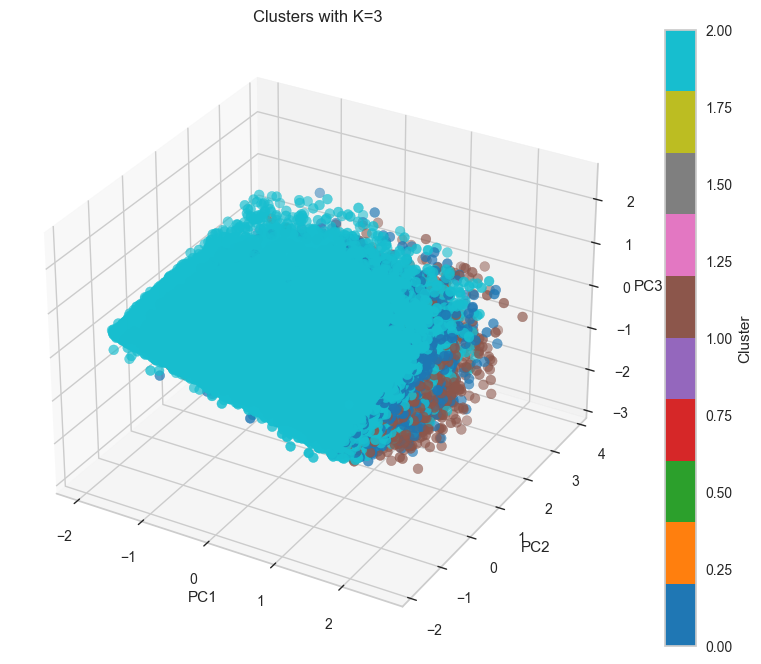

군집별 비중:
Cluster 2: 72.03%
Cluster 0: 20.06%
Cluster 1: 7.91%


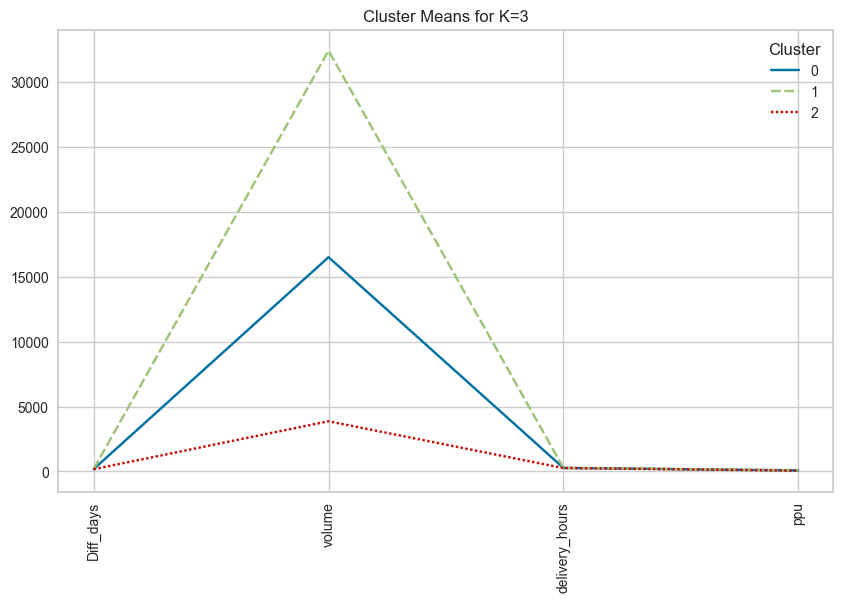

K=4에 대한 클러스터링 진행 중...


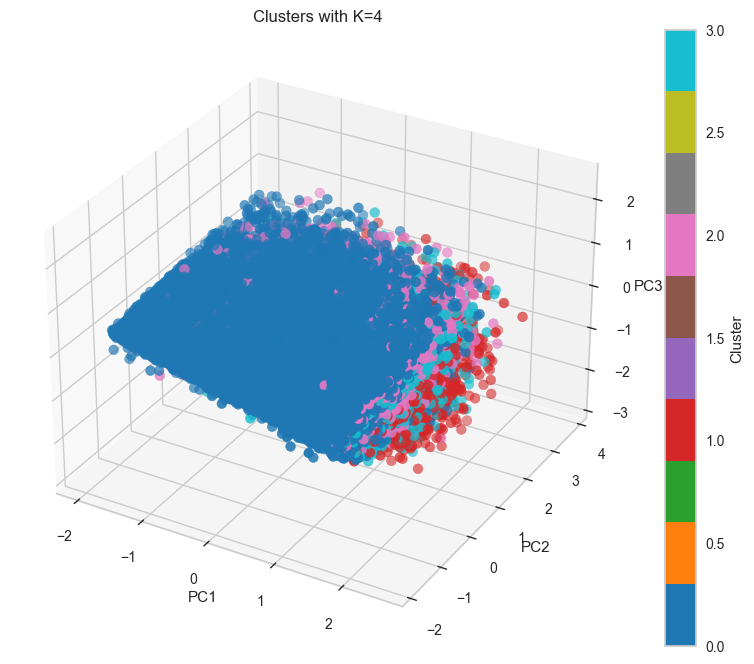

군집별 비중:
Cluster 0: 56.03%
Cluster 2: 22.08%
Cluster 3: 14.56%
Cluster 1: 7.33%


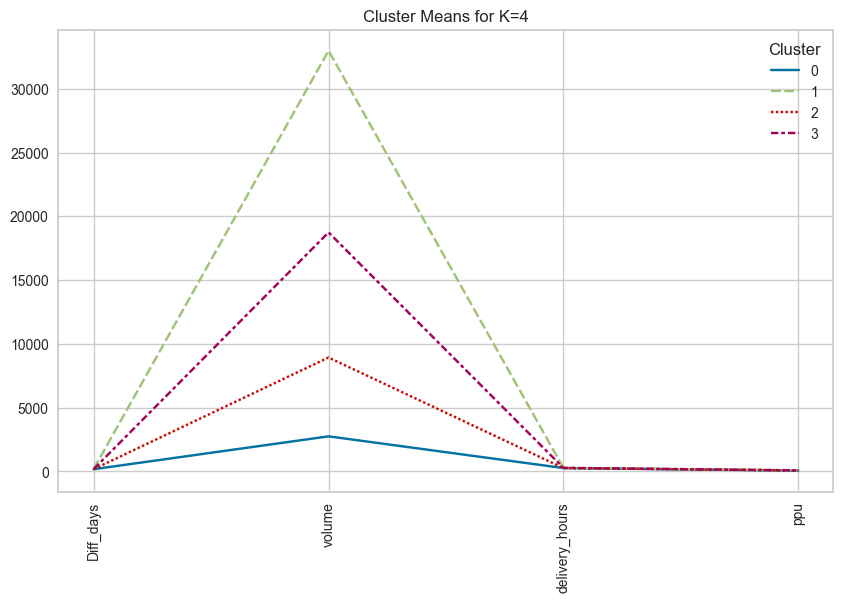

{3: {'kmeans_model': KMeans(init='random', n_clusters=3, random_state=42),
  'labels': array([2, 0, 2, ..., 2, 2, 2], dtype=int32),
  'cluster_centers': array([[  179.10622974, 16536.90448326,   267.72020166,    75.2367933 ],
         [  186.18296602, 32460.74540863,   274.1446281 ,    86.54166437],
         [  169.61315934,  3867.6001102 ,   258.17810449,    57.51435431]])},
 4: {'kmeans_model': KMeans(init='random', n_clusters=4, random_state=42),
  'labels': array([0, 3, 0, ..., 0, 2, 0], dtype=int32),
  'cluster_centers': array([[  168.861086  ,  2739.35488765,   258.72588456,    54.95518401],
         [  189.40728885, 32991.71115489,   275.9152918 ,    85.24399902],
         [  171.82307315,  8898.18305029,   255.79204768,    68.88540741],
         [  181.1458359 , 18715.63257249,   272.4618137 ,    76.10706601]])}}

In [124]:
# 함수 호출
perform_kmeans_clustering(
    merged_result,
    pca_df, 
    range(3, 5), 
    feature_names=['Diff_days', 'volume', 'delivery_hours', 'ppu'],
    random_state=42
)


In [77]:
final_result

Diff_days    volume  delivery_hours       ppu  Cluster
0       0.961538  0.072914        0.221918  0.312011        1
1       0.623626  0.303568        0.232877  0.669047        3
2       0.057692  0.048435        0.173973  0.192376        0
3       0.719780  0.054946        0.249315  0.213057        1
4       0.445055  0.121349        0.300000  0.545670        0
...          ...       ...             ...       ...      ...
62731   0.414835  0.045180        0.532877  0.180889        1
62732   0.837912  0.049824        0.665753  0.246674        1
62733   0.195055  0.107461        0.509589  0.454830        0
62734   0.848901  0.204158        0.130137  0.410385        1
62735   0.219780  0.033462        0.136986  0.271439        0

[62736 rows x 5 columns]

In [78]:
merged_result

Diff_days   volume  delivery_hours     ppu Cluster
0            351   3528.0           182.0   45.61       1
1            228  14157.0           190.0  181.13       3
2             22   2400.0           147.0    0.20       0
3            263   2700.0           202.0    8.05       1
4            163   5760.0           239.0  134.30       0
...          ...      ...             ...     ...     ...
62731        152   2250.0           409.0   -4.16       1
62732        306   2464.0           506.0   20.81       1
62733         72   5120.0           392.0   99.82       0
62734        310   9576.0           115.0   82.95       1
62735         81   1710.0           120.0   30.21       0

[62736 rows x 5 columns]

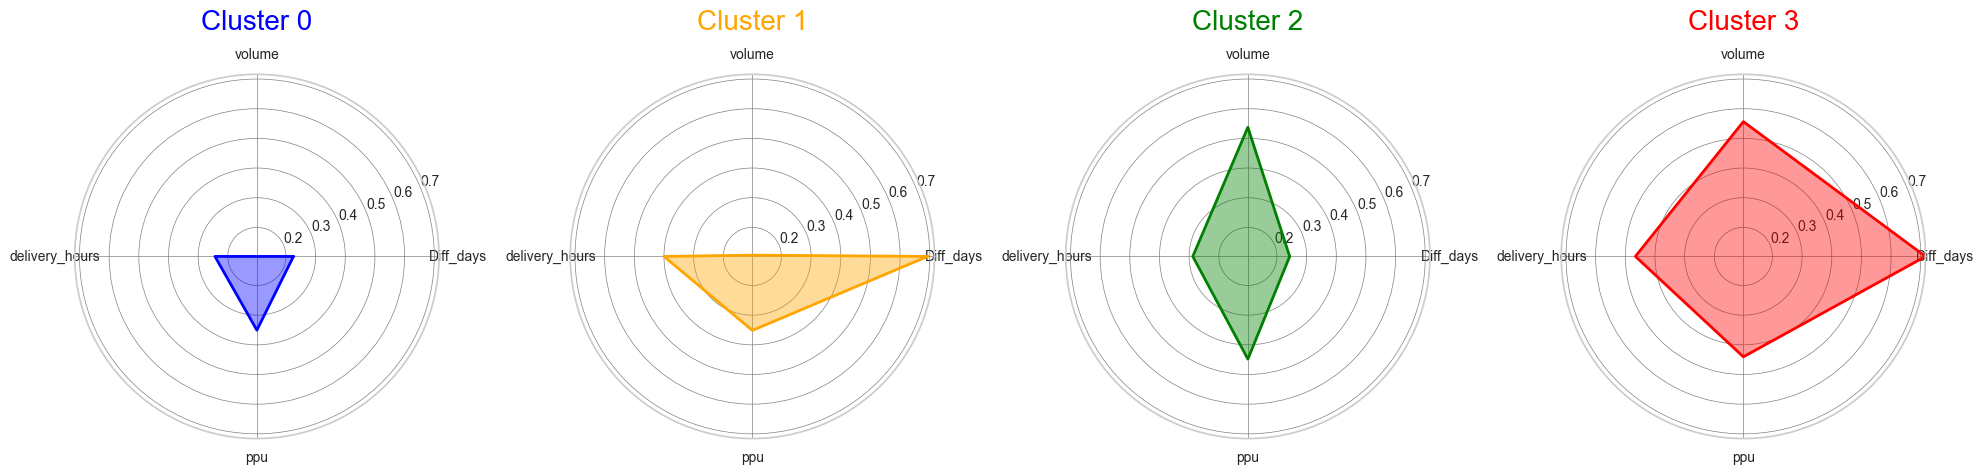

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

final_result

# 각 클러스터의 중심점 계산
cluster_centroids = final_result.groupby('Cluster').mean()

# 레이더 차트를 그리는 함수
def create_radar_chart(ax, angles, data, color, cluster, min_val, max_val):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    ax.set_ylim(min_val, max_val)  # 동일한 축 범위 적용
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# 레이블 설정
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# 각 축의 각도 계산
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 플롯이 원형이기 때문에 첫 번째 값을 끝에 추가하여 루프를 완성
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Find the min and max values across all clusters to set uniform axis range
min_val = cluster_centroids.min().min()  # 최소값
max_val = cluster_centroids.max().max()  # 최대값

# 그림 초기화
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=len(cluster_centroids))

# 각 클러스터에 대해 레이더 차트를 그리기
colors = ['blue', 'orange', 'green', 'red', 'purple']  # 클러스터 색상 정의

for i, color in enumerate(colors[:len(cluster_centroids)]):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # 루프를 완성
    create_radar_chart(ax[i], angles, data, color, i, min_val, max_val)

# 입력 데이터 추가
for a in ax:
    a.set_xticks(angles[:-1])
    a.set_xticklabels(labels[:-1])

# 그리드 추가
for a in ax:
    a.grid(color='grey', linewidth=0.5)

# 플롯 표시
plt.tight_layout()
plt.show()


In [80]:
pca_df

PC1       PC2  Cluster
0      0.407220 -0.226623        1
1      0.125270  0.142751        3
2     -0.459588 -0.154997        0
3      0.186398 -0.232254        1
4     -0.039495 -0.028683        0
...         ...       ...      ...
62731 -0.004367 -0.170677        1
62732  0.438379 -0.194386        1
62733 -0.205663 -0.004768        0
62734  0.285698 -0.069886        1
62735 -0.320194 -0.175278        0

[62736 rows x 3 columns]

In [81]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

# Compute number of customers
num_observations = len(pca_df)

# Separate the features and the cluster labels
X = pca_df.drop('Cluster', axis=1)
clusters = pca_df['Cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))


+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |       62736        |
|    Silhouette Score     | 0.4479709117802217 |
| Calinski Harabasz Score | 59240.22141068875  |
|  Davies Bouldin Score   | 0.814640110882281  |
+-------------------------+--------------------+


### 클러스터링 품질 평가

- 실루엣 점수(Silhouette Score): 0.448로, 1에 가까운 점수는 아니지만 비교적 양호한 클러스터 간 분리를 나타냅니다. 이 점수는 클러스터 내부 데이터가 얼마나 응집력 있고 다른 클러스터와 잘 분리되어 있는지를 평가합니다. 0.448이라는 값은 클러스터링이 어느 정도 효과적으로 이루어졌음을 보여줍니다.

- 칼린스키-하라바즈 점수(Calinski-Harabasz Score): 59240.22로 매우 높은 값입니다. 이 점수는 클러스터 간 분산 대비 클러스터 내부 분산의 비율을 측정하며, 값이 클수록 클러스터가 잘 정의되어 있음을 나타냅니다. 높은 점수는 데이터 구조를 잘 반영하고 있음을 시사합니다.

- 데이비스-볼딘 점수(Davies-Bouldin Score): 0.815로, 낮은 값은 클러스터 간 유사성이 적고 더 뚜렷하게 분리되었음을 의미합니다. 이 값은 클러스터 간 분리가 상당히 잘 이루어졌음을 보여주며, 클러스터링 품질이 높다는 점을 뒷받침합니다.

    >결론: 총 62,736개 데이터를 대상으로 한 클러스터링 결과는 비교적 높은 품질을 보여줍니다. 클러스터는 잘 정의되어 있으며, 내부적으로 응집력이 있고 다른 클러스터와도 적절히 분리된 상태입니다. 추가적인 최적화는 필요하지 않을 가능성이 크지만, 데이터의 더 나은 분리나 클러스터링 성능 향상을 위해 차원 축소 기법이나 다른 클러스터링 알고리즘을 시도할 여지는 여전히 존재합니다.